# 📉 PCA - Principal Component Analysis

**Module 05: Dimensionality Reduction Techniques**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Curse of Dimensionality** - Why too many features hurt performance
2. **PCA Mathematics** - Eigenvectors, eigenvalues, and covariance
3. **Variance Explained** - How much information each component captures
4. **Feature Transformation** - Linear combinations of original features
5. **Dimensionality Reduction** - Compress data while retaining information
6. **Visualization** - Project high-dimensional data to 2D/3D
7. **Application in ML Pipeline** - PCA for preprocessing and speedup

## 📚 Section 1: Theoretical Foundation

### What is Dimensionality Reduction?

**Core Problem:** High-dimensional data is hard to:
- Visualize
- Compute (slow, memory-intensive)
- Interpret
- Model (overfitting, curse of dimensionality)

**Solution:** Transform data to lower dimensions while preserving important information

**Analogy:**
```
Imagine a 3D shadow on a 2D wall:

3D Object (original data)     2D Shadow (reduced data)
     🎭                              ▓▓
    /|\                              ▓▓
   / | \                             ▓▓
  
Lost: depth information
Kept: shape, size, relative positions

PCA finds the "best angle" to cast the shadow
that preserves maximum information!
```

---

### 🎯 What is PCA?

**Principal Component Analysis (PCA):**
- Unsupervised linear dimensionality reduction technique
- Finds directions (principal components) of maximum variance
- Projects data onto these directions
- Orders components by importance (variance explained)

**Key Ideas:**
```
Original Data:           PCA Transformation:

Feature 1                PC1 (90% variance)
Feature 2         →      PC2 (8% variance)
Feature 3                PC3 (2% variance)
...                      ...
Feature n                

Keep top k components that explain most variance
Discard remaining components (low information)
```

---

### 🧮 The Mathematics of PCA

**Step 1: Standardize Data**
```
Why? Features with larger scales dominate variance

X_standardized = (X - mean) / std

Example:
Age: [20, 25, 30] → [-1, 0, 1]
Income: [30000, 50000, 70000] → [-1, 0, 1]

Now both features equally important!
```

**Step 2: Compute Covariance Matrix**
```
Covariance measures how features vary together

Cov(X) = (1/n) × X^T × X

Result: n×n symmetric matrix

Example (2D):
Cov = [ Var(X₁)      Cov(X₁,X₂) ]
      [ Cov(X₂,X₁)   Var(X₂)    ]

Diagonal: Variance of each feature
Off-diagonal: Covariance between features
```

**Step 3: Compute Eigenvectors & Eigenvalues**
```
Eigenvector: Direction of maximum variance
Eigenvalue: Amount of variance in that direction

Solve: Cov(X) × v = λ × v

Where:
v = eigenvector (direction)
λ = eigenvalue (magnitude)

Geometric Interpretation:

    │     ↗ PC1 (eigenvector, λ₁=5.2)
    │    ↗
    │   ↗
    │  ↗  ○ ○
    │ ↗ ○   ○
    ↗○   ○
   ○  ○
  ─────────── PC2 (eigenvector, λ₂=0.8)

PC1: Main direction of data spread
PC2: Perpendicular, secondary spread
```

**Step 4: Sort by Eigenvalues**
```
Eigenvalues sorted (descending):
λ₁ > λ₂ > λ₃ > ... > λₙ

Corresponding eigenvectors:
v₁, v₂, v₃, ..., vₙ

PC1 = v₁ (explains most variance, λ₁)
PC2 = v₂ (explains second most, λ₂)
...
```

**Step 5: Project Data**
```
Choose top k components (k < n)

X_transformed = X × [v₁, v₂, ..., vₖ]

Result: n×k matrix (reduced dimensions!)

Example:
X: 1000 samples × 50 features
Keep k=2 components
X_pca: 1000 samples × 2 features

Reduction: 50D → 2D (96% reduction!)
```

---

### 📊 Variance Explained

**How Much Information Retained?**
```
Variance explained by PC_i:

Explained Variance Ratio = λᵢ / Σλⱼ
                               j

Example (3 components):
λ₁ = 5.2  → 5.2/6.5 = 80%
λ₂ = 0.8  → 0.8/6.5 = 12%
λ₃ = 0.5  → 0.5/6.5 = 8%
Total = 6.5    100%

Keep PC1 + PC2 → 92% variance retained!
```

**Cumulative Explained Variance:**
```
PC1: 80%
PC1+PC2: 92%
PC1+PC2+PC3: 100%

Decision: Keep components until reaching target (e.g., 95%)
```

---

### 🎨 Geometric Intuition

**2D Example:**
```
Original Data:              After PCA:

  Feature 2                   PC2
     │                         │
   4 │  ○○                   1 │
   3 │ ○  ○                  0 │  ●●●●
   2 │○    ○                -1 │
   1 │     ○                  └─────── PC1
   0 └────────              -2  0   2
     0 1 2 3 4
  Feature 1

Observations:
• Data rotated to align with maximum variance
• PC1 captures main trend (diagonal)
• PC2 captures residual spread (perpendicular)
• Can drop PC2 with minimal information loss
```

**What PCA Does:**
```
1. Centers data at origin
2. Finds direction of maximum spread (PC1)
3. Finds perpendicular direction of next maximum spread (PC2)
4. Repeats for all dimensions
5. Components ordered by importance
6. Keep top k components
```

---

### 🔍 What Are Principal Components?

**Principal Components = Linear Combinations of Original Features**

```
Example (3 features: height, weight, age):

PC1 = 0.70×height + 0.65×weight + 0.30×age
PC2 = 0.20×height - 0.40×weight + 0.89×age
PC3 = 0.68×height - 0.63×weight - 0.36×age

Interpretation:
• PC1: Overall "size" (height + weight dominate)
• PC2: "Age-adjusted size" (age positive, weight negative)
• PC3: "Height vs weight ratio"

Each PC is a new synthetic feature!
```

**Properties:**
- **Orthogonal**: PCs are perpendicular (uncorrelated)
- **Unit length**: Eigenvectors normalized to length 1
- **Ordered**: PC1 > PC2 > PC3 > ... in variance
- **Reversible**: Can reconstruct original data (with loss if compressed)

---

### 📈 Curse of Dimensionality

**The Problem:**
```
As dimensions increase:

1D: 10 points needed to cover space
2D: 100 points needed (10²)
3D: 1,000 points needed (10³)
100D: 10¹⁰⁰ points needed (impossible!)

With fixed samples, data becomes sparse!
```

**Effects:**
```
• Distance metrics become meaningless
• All points seem equally far apart
• Overfitting increases (more features than samples)
• Computation becomes expensive
• Visualization impossible

Example:
1000 samples, 50 features → 20 samples per feature (sparse!)
1000 samples, 5 features → 200 samples per feature (dense!)
```

**PCA Solution:**
```
Reduce 50 features → 10 components (keeping 95% variance)

Benefits:
✓ Denser representation
✓ Faster computation
✓ Less overfitting
✓ Easier visualization
✓ Better generalization
```

---

### 🎛️ PCA Hyperparameters

| **Parameter** | **Options** | **Effect** | **When to Use** |
|--------------|------------|-----------|----------------|
| **n_components** | int, float, 'mle' | Number/ratio of components | int: exact number, float: variance ratio |
| **whiten** | True, False | Normalize component variance | When features have different scales |
| **svd_solver** | 'auto', 'full', 'arpack', 'randomized' | Computation method | 'randomized' for large datasets |

**n_components Examples:**
```python
n_components=2         # Keep exactly 2 components
n_components=0.95      # Keep enough for 95% variance
n_components='mle'     # Automatically choose optimal
n_components=None      # Keep all components
```

---

### 📊 Advantages vs Disadvantages

| **Advantages ✅** | **Disadvantages ❌** |
|------------------|---------------------|
| Reduces dimensions dramatically | Components hard to interpret |
| Speeds up training | Linear transformation only |
| Reduces overfitting | Assumes variance = importance |
| Enables visualization (2D/3D) | Sensitive to scaling |
| Removes multicollinearity | May lose nonlinear patterns |
| Noise reduction | Not suitable for sparse data |
| Decorrelates features | Requires centering data |
| Fast computation | Can lose discriminative info |

---

### 🎯 When to Use PCA?

| **Use PCA When** | **Avoid When** |
|-----------------|---------------|
| High-dimensional data (>50 features) | Need interpretable features |
| Features are correlated | Features already independent |
| Need visualization (2D/3D) | Nonlinear relationships critical |
| Training too slow | Sparse data (text, images) |
| Want noise reduction | Variance ≠ importance |
| Need to reduce storage | Small number of features |
| Multicollinearity present | Labels contain useful info (use LDA) |

---

### 🔬 PCA vs Other Techniques

| **Method** | **Type** | **Linearity** | **Preserves** | **Use Case** |
|-----------|---------|--------------|--------------|-------------|
| **PCA** | Unsupervised | Linear | Variance | General dimensionality reduction |
| **LDA** | Supervised | Linear | Discriminability | Classification preprocessing |
| **t-SNE** | Unsupervised | Nonlinear | Local structure | Visualization only |
| **UMAP** | Unsupervised | Nonlinear | Global + local | Visualization + preprocessing |
| **Autoencoder** | Unsupervised | Nonlinear | Reconstruction | Complex patterns |

---

### 💡 Key Insights

**What PCA Actually Does:**
```
1. Rotation: Align axes with data spread
2. Ranking: Order axes by importance
3. Selection: Keep most important axes
4. Projection: Express data in new coordinates
```

**When Variance = Information:**
```
Good:
• Numerical measurements (height, weight, temperature)
• Sensor readings
• Financial data
• Image pixels (nearby pixels correlated)

Not Good:
• Text data (bag of words - sparse, high variance may be noise)
• Binary features
• Categorical variables
• When rare events are important
```

**Reconstruction:**
```
Original Data (100D) → PCA → Compressed (10D)
                                   ↓
Reconstructed Data (100D) ← Inverse Transform

Reconstruction Error = Information Lost
```

## 🔧 Section 2: Setup & Dataset Loading

In [4]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_digits, load_wine, fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 2.1 Dataset 1: Breast Cancer (30 features)

In [7]:
# Load Breast Cancer Dataset
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

print("📊 Breast Cancer Dataset")
print(f"Shape: {df_cancer.shape}")
print(f"Features: {len(cancer.feature_names)}")
print(f"Classes: {cancer.target_names.tolist()}")
print(f"\nFeature names (first 10):")
for i, feat in enumerate(cancer.feature_names[:10], 1):
    print(f"  {i}. {feat}")
print("  ...")

📊 Breast Cancer Dataset
Shape: (569, 31)
Features: 30
Classes: ['malignant', 'benign']

Feature names (first 10):
  1. mean radius
  2. mean texture
  3. mean perimeter
  4. mean area
  5. mean smoothness
  6. mean compactness
  7. mean concavity
  8. mean concave points
  9. mean symmetry
  10. mean fractal dimension
  ...


In [9]:
# Prepare data
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

# Standardize features (CRITICAL for PCA!)
scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

print(f"\n✂️ Data Preparation:")
print(f"Original shape: {X_cancer.shape}")
print(f"Scaled shape: {X_cancer_scaled.shape}")
print(f"\n💡 Features scaled to mean=0, std=1 (required for PCA)")


✂️ Data Preparation:
Original shape: (569, 30)
Scaled shape: (569, 30)

💡 Features scaled to mean=0, std=1 (required for PCA)


### 2.2 Dataset 2: Digits (64 features - Images)

In [12]:
# Load Digits Dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print("\n📊 Digits Dataset (Handwritten Digits)")
print(f"Shape: {X_digits.shape}")
print(f"Features: {X_digits.shape[1]} pixels (8×8 images)")
print(f"Classes: {len(np.unique(y_digits))} digits (0-9)")
print(f"Samples: {X_digits.shape[0]}")


📊 Digits Dataset (Handwritten Digits)
Shape: (1797, 64)
Features: 64 pixels (8×8 images)
Classes: 10 digits (0-9)
Samples: 1797


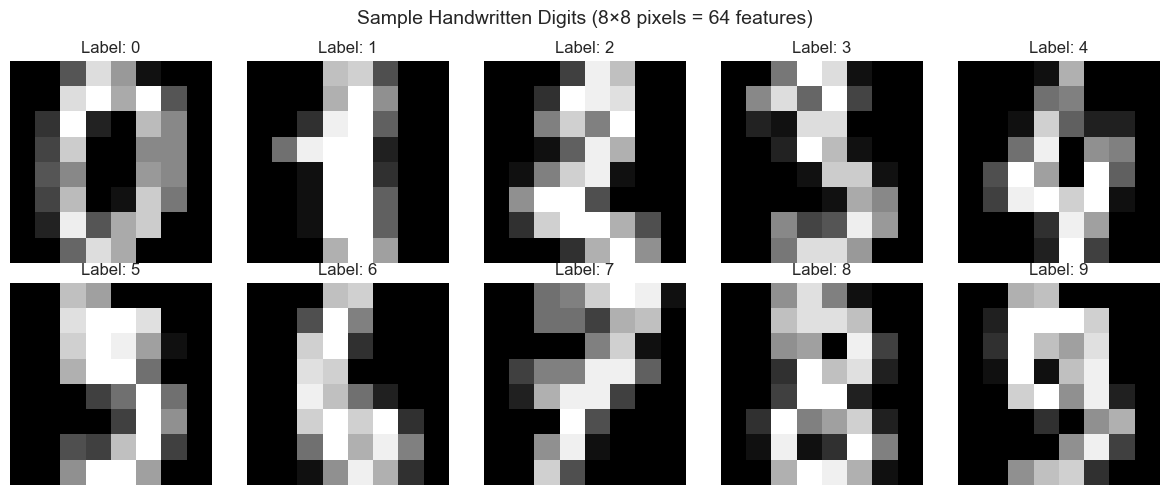

In [14]:
# Visualize sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y_digits[i]}")
    ax.axis('off')
plt.suptitle("Sample Handwritten Digits (8×8 pixels = 64 features)", fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
# Standardize digits data
scaler_digits = StandardScaler()
X_digits_scaled = scaler_digits.fit_transform(X_digits)

print("\n✂️ Digits Data Scaled")


✂️ Digits Data Scaled


### 2.3 Why Scaling is Critical for PCA

In [19]:
# Demonstrate importance of scaling
print("\n🔍 Why Scaling Matters for PCA:")
print("="*70)

# Show feature scales before standardization
feature_stats = pd.DataFrame({
    'Feature': cancer.feature_names[:5],
    'Mean': X_cancer.iloc[:, :5].mean().values,
    'Std': X_cancer.iloc[:, :5].std().values,
    'Min': X_cancer.iloc[:, :5].min().values,
    'Max': X_cancer.iloc[:, :5].max().values
})

print("\nOriginal Feature Scales (first 5 features):")
print(feature_stats.to_string(index=False))

print("\n💡 Problem: Features with larger scales dominate PCA!")
print("   Example: 'mean area' (range ~0-2500) vs 'mean smoothness' (range ~0.05-0.16)")
print("\n✅ Solution: StandardScaler makes all features equally important")


🔍 Why Scaling Matters for PCA:

Original Feature Scales (first 5 features):
        Feature       Mean        Std       Min       Max
    mean radius  14.127292   3.524049   6.98100   28.1100
   mean texture  19.289649   4.301036   9.71000   39.2800
 mean perimeter  91.969033  24.298981  43.79000  188.5000
      mean area 654.889104 351.914129 143.50000 2501.0000
mean smoothness   0.096360   0.014064   0.05263    0.1634

💡 Problem: Features with larger scales dominate PCA!
   Example: 'mean area' (range ~0-2500) vs 'mean smoothness' (range ~0.05-0.16)

✅ Solution: StandardScaler makes all features equally important


## 📊 Section 3: Basic PCA Application

### 3.1 Fitting PCA on Breast Cancer Data

In [24]:
# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X_cancer_scaled)

print("📊 PCA Fitted on Breast Cancer Data")
print(f"Original dimensions: {X_cancer_scaled.shape[1]}")
print(f"Number of components: {pca_full.n_components_}")
print(f"Total variance explained: {pca_full.explained_variance_ratio_.sum():.4f}")

📊 PCA Fitted on Breast Cancer Data
Original dimensions: 30
Number of components: 30
Total variance explained: 1.0000


In [27]:
# Analyze variance explained by each component
variance_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca_full.explained_variance_ratio_))],
    'Variance Explained': pca_full.explained_variance_ratio_,
    'Cumulative Variance': np.cumsum(pca_full.explained_variance_ratio_)
})

print("\n📊 Variance Explained by Each Component (first 10):")
print("="*70)
print(variance_df.head(10).to_string(index=False))


📊 Variance Explained by Each Component (first 10):
  PC  Variance Explained  Cumulative Variance
 PC1            0.442720             0.442720
 PC2            0.189712             0.632432
 PC3            0.093932             0.726364
 PC4            0.066021             0.792385
 PC5            0.054958             0.847343
 PC6            0.040245             0.887588
 PC7            0.022507             0.910095
 PC8            0.015887             0.925983
 PC9            0.013896             0.939879
PC10            0.011690             0.951569


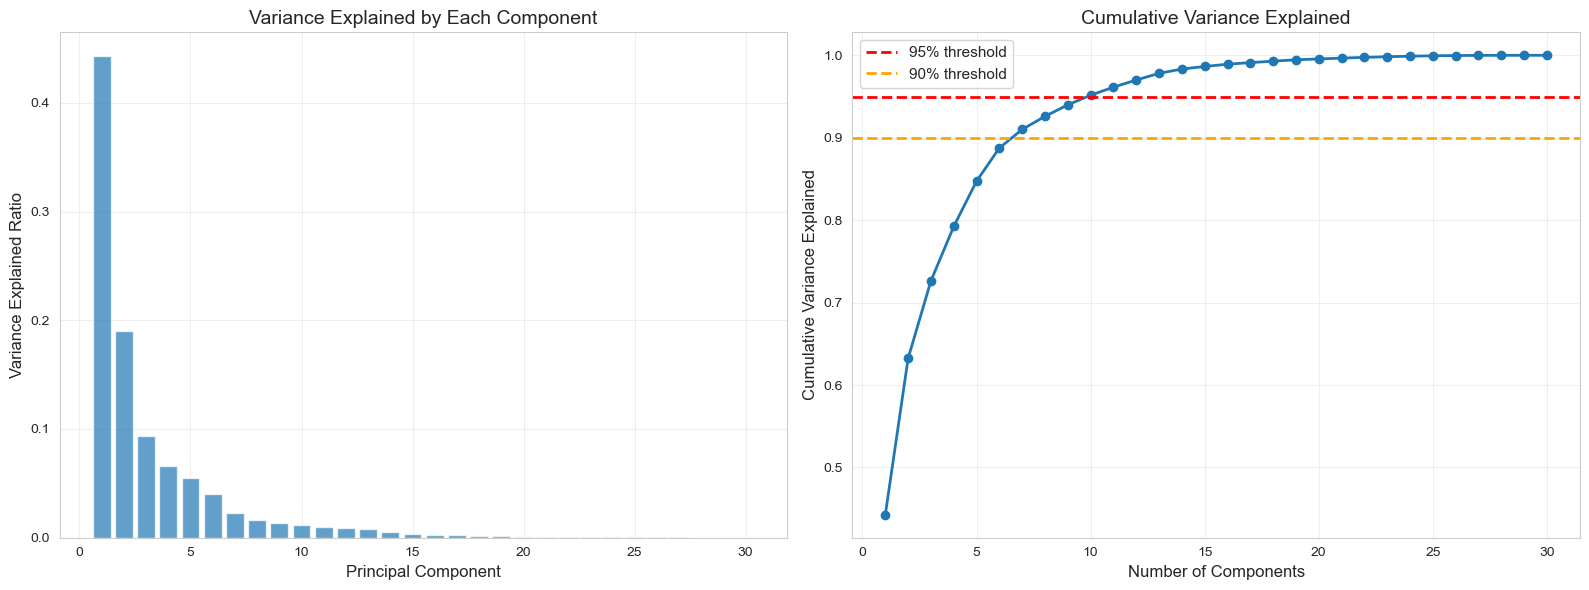


💡 Dimensionality Reduction Potential:
  • Original features: 30
  • For 90% variance: 7 components (→ 76.7% reduction)
  • For 95% variance: 10 components (→ 66.7% reduction)


In [29]:
# Visualize variance explained
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Individual variance
axes[0].bar(range(1, 31), pca_full.explained_variance_ratio_, alpha=0.7)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Variance Explained Ratio', fontsize=12)
axes[0].set_title('Variance Explained by Each Component', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot(range(1, 31), np.cumsum(pca_full.explained_variance_ratio_), 
             marker='o', linewidth=2, markersize=6)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold', linewidth=2)
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% threshold', linewidth=2)
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Variance Explained', fontsize=12)
axes[1].set_title('Cumulative Variance Explained', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for different thresholds
n_95 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1
n_90 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.90) + 1

print(f"\n💡 Dimensionality Reduction Potential:")
print(f"  • Original features: 30")
print(f"  • For 90% variance: {n_90} components (→ {(1-n_90/30)*100:.1f}% reduction)")
print(f"  • For 95% variance: {n_95} components (→ {(1-n_95/30)*100:.1f}% reduction)")

### 3.2 Transforming Data with PCA

In [32]:
# Transform to 2 components for visualization
pca_2d = PCA(n_components=2)
X_cancer_pca = pca_2d.fit_transform(X_cancer_scaled)

print("\n📊 PCA Transformation to 2D:")
print(f"Original shape: {X_cancer_scaled.shape}")
print(f"Transformed shape: {X_cancer_pca.shape}")
print(f"Variance explained: {pca_2d.explained_variance_ratio_.sum():.4f} ({pca_2d.explained_variance_ratio_.sum()*100:.1f}%)")
print(f"\nPC1 explains: {pca_2d.explained_variance_ratio_[0]:.4f} ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)")
print(f"PC2 explains: {pca_2d.explained_variance_ratio_[1]:.4f} ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)")


📊 PCA Transformation to 2D:
Original shape: (569, 30)
Transformed shape: (569, 2)
Variance explained: 0.6324 (63.2%)

PC1 explains: 0.4427 (44.3%)
PC2 explains: 0.1897 (19.0%)


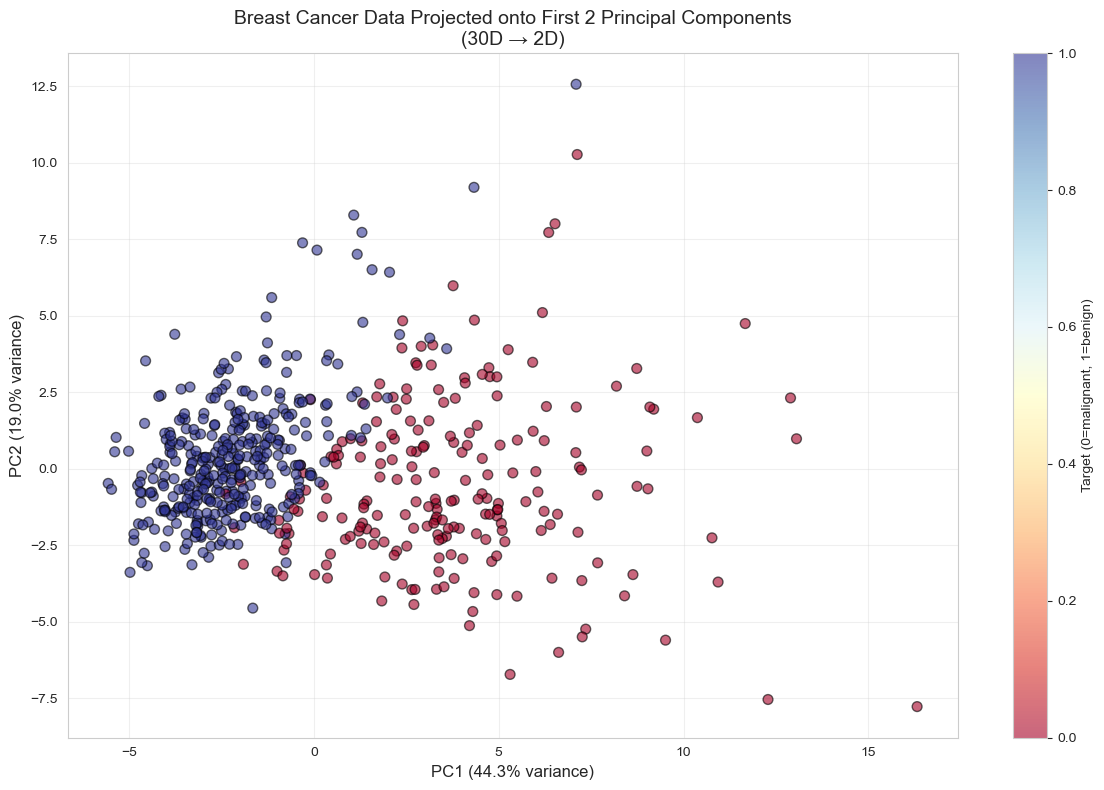


💡 Observations:
  • Two classes visibly separated in 2D
  • PC1 captures main separation
  • PC2 captures additional structure
  • 63% total variance retained with just 2 components!


In [34]:
# Visualize 2D projection
plt.figure(figsize=(12, 8))

scatter = plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], 
                     c=y_cancer, cmap='RdYlBu', 
                     alpha=0.6, edgecolors='black', s=50)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('Breast Cancer Data Projected onto First 2 Principal Components\n(30D → 2D)', fontsize=14)
plt.colorbar(scatter, label='Target (0=malignant, 1=benign)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  • Two classes visibly separated in 2D")
print("  • PC1 captures main separation")
print("  • PC2 captures additional structure")
print("  • 63% total variance retained with just 2 components!")

### 3.3 3D Visualization

In [37]:
# Transform to 3 components
pca_3d = PCA(n_components=3)
X_cancer_pca_3d = pca_3d.fit_transform(X_cancer_scaled)

print(f"\n📊 PCA Transformation to 3D:")
print(f"Variance explained: {pca_3d.explained_variance_ratio_.sum():.4f} ({pca_3d.explained_variance_ratio_.sum()*100:.1f}%)")


📊 PCA Transformation to 3D:
Variance explained: 0.7264 (72.6%)


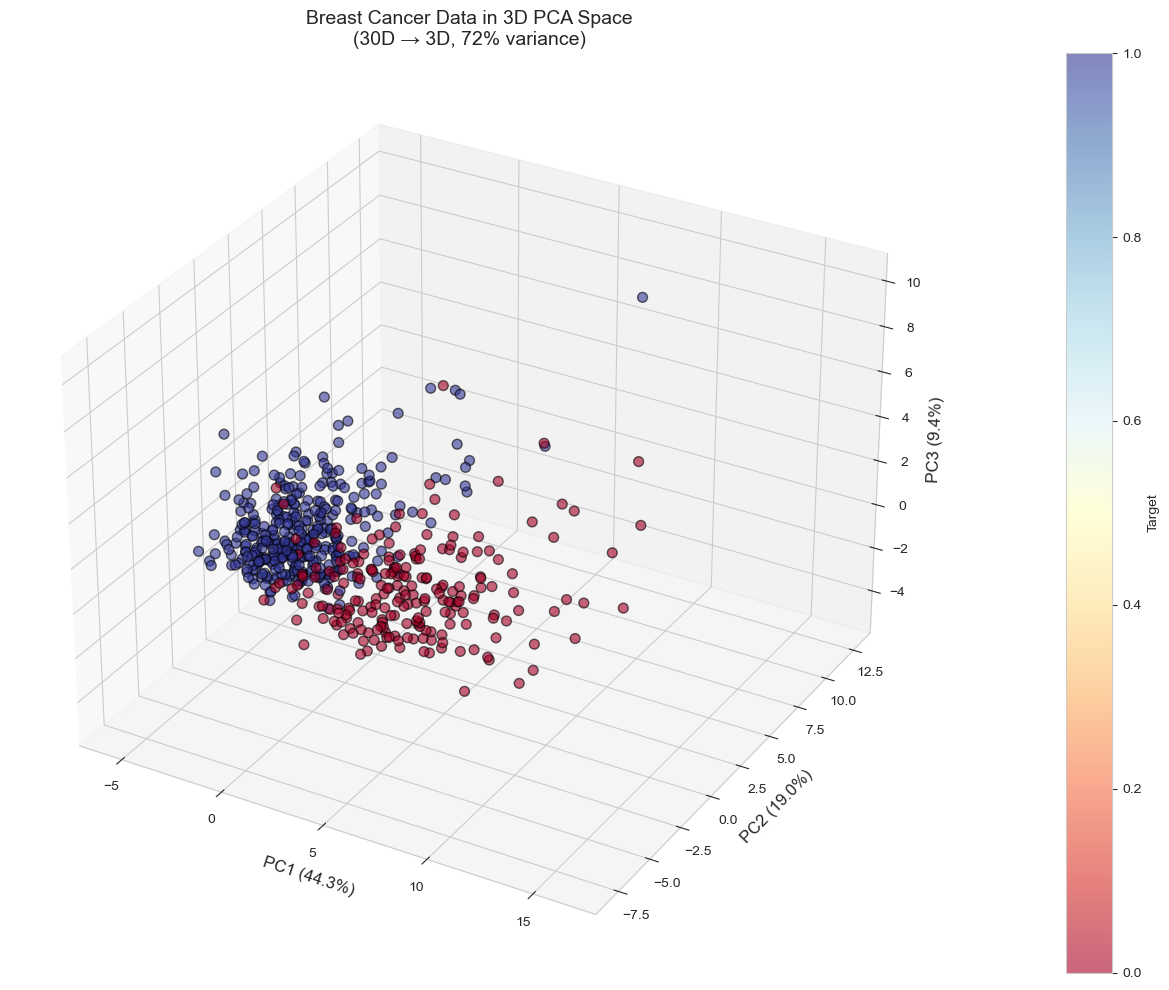

In [39]:
# 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_cancer_pca_3d[:, 0], 
                     X_cancer_pca_3d[:, 1], 
                     X_cancer_pca_3d[:, 2],
                     c=y_cancer, cmap='RdYlBu', 
                     alpha=0.6, edgecolors='black', s=50)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})', fontsize=12)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})', fontsize=12)
ax.set_title('Breast Cancer Data in 3D PCA Space\n(30D → 3D, 72% variance)', fontsize=14)

plt.colorbar(scatter, label='Target', pad=0.1)
plt.tight_layout()
plt.show()

## 📊 Section 4: Understanding Principal Components

### 4.1 Component Loadings (Feature Contributions)

In [43]:
# Get component loadings (eigenvectors)
components_df = pd.DataFrame(
    pca_full.components_[:5, :],  # First 5 PCs
    columns=cancer.feature_names,
    index=[f'PC{i+1}' for i in range(5)]
)

print("\n📊 Component Loadings (First 5 PCs, First 10 Features):")
print("="*70)
print(components_df.iloc[:, :10].to_string())

print("\n💡 Interpretation:")
print("  • Each value shows feature's contribution to PC")
print("  • Positive: feature increases PC value")
print("  • Negative: feature decreases PC value")
print("  • Magnitude: importance of feature in PC")


📊 Component Loadings (First 5 PCs, First 10 Features):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension
PC1     0.218902      0.103725        0.227537   0.220995         0.142590          0.239285        0.258400             0.260854       0.138167                0.064363
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113          0.151892        0.060165            -0.034768       0.190349                0.366575
PC3    -0.008531      0.064550       -0.009314   0.028700        -0.104292         -0.074092        0.002734            -0.025564      -0.040240               -0.022574
PC4    -0.041409      0.603050       -0.041983  -0.053434        -0.159383         -0.031795       -0.019123            -0.065336      -0.067125               -0.048587
PC5    -0.037786      0.049469       -0.037375  -0.010331         0.365089         -0.011704       

In [45]:
# Visualize PC1 loadings
pc1_loadings = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Loading': pca_full.components_[0]
}).sort_values('Loading', key=abs, ascending=False)

print("\n📊 PC1 Feature Loadings (Top 10):")
print(pc1_loadings.head(10).to_string(index=False))


📊 PC1 Feature Loadings (Top 10):
             Feature  Loading
 mean concave points 0.260854
      mean concavity 0.258400
worst concave points 0.250886
    mean compactness 0.239285
     worst perimeter 0.236640
     worst concavity 0.228768
        worst radius 0.227997
      mean perimeter 0.227537
          worst area 0.224871
           mean area 0.220995


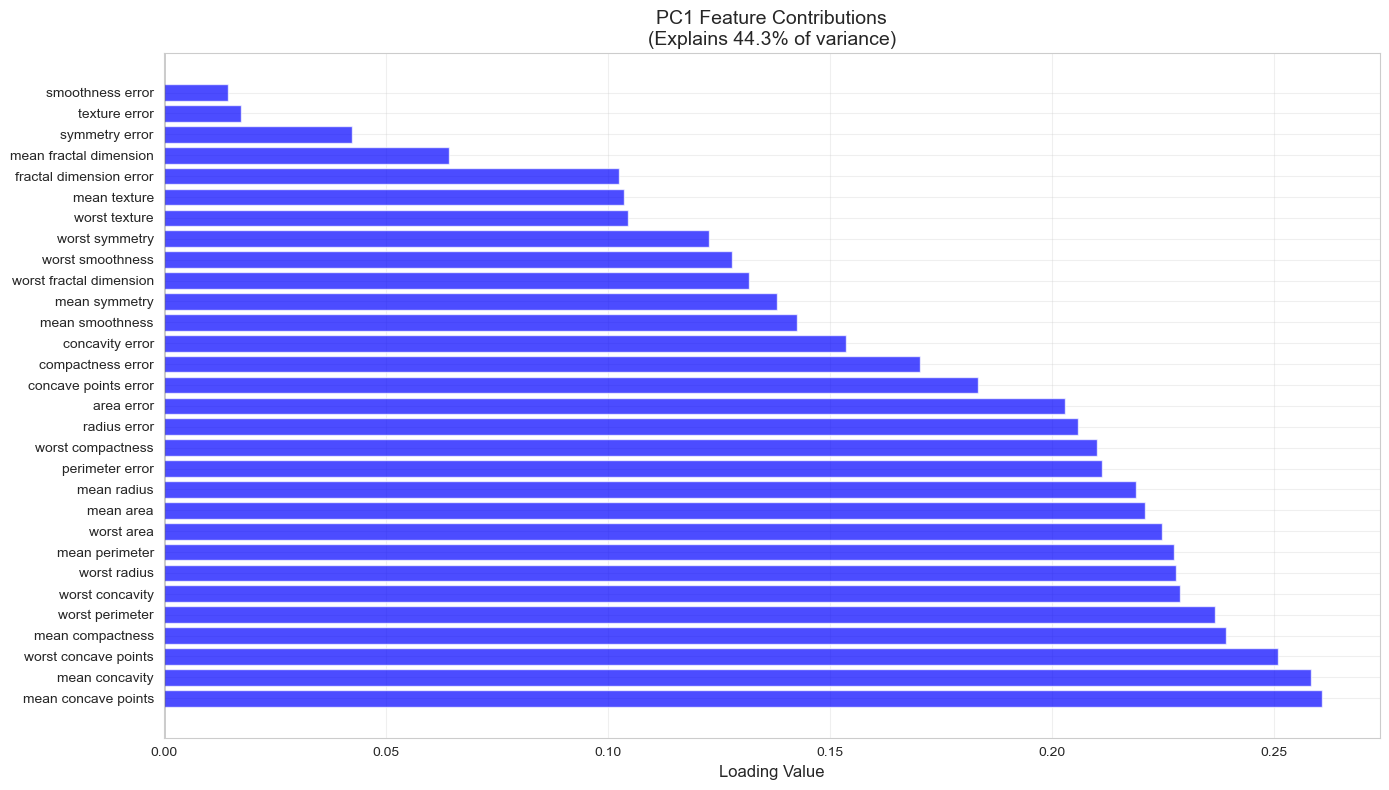


💡 PC1 Interpretation:
  • Dominated by texture, perimeter, area features
  • Represents overall 'tumor size and complexity'
  • Most features contribute positively


In [47]:
# Plot PC1 loadings
plt.figure(figsize=(14, 8))
colors = ['red' if x < 0 else 'blue' for x in pc1_loadings['Loading']]
plt.barh(range(len(cancer.feature_names)), pc1_loadings['Loading'], color=colors, alpha=0.7)
plt.yticks(range(len(cancer.feature_names)), pc1_loadings['Feature'])
plt.xlabel('Loading Value', fontsize=12)
plt.title(f'PC1 Feature Contributions\n(Explains {pca_full.explained_variance_ratio_[0]:.1%} of variance)', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 PC1 Interpretation:")
print("  • Dominated by texture, perimeter, area features")
print("  • Represents overall 'tumor size and complexity'")
print("  • Most features contribute positively")

### 4.2 Heatmap of All Component Loadings

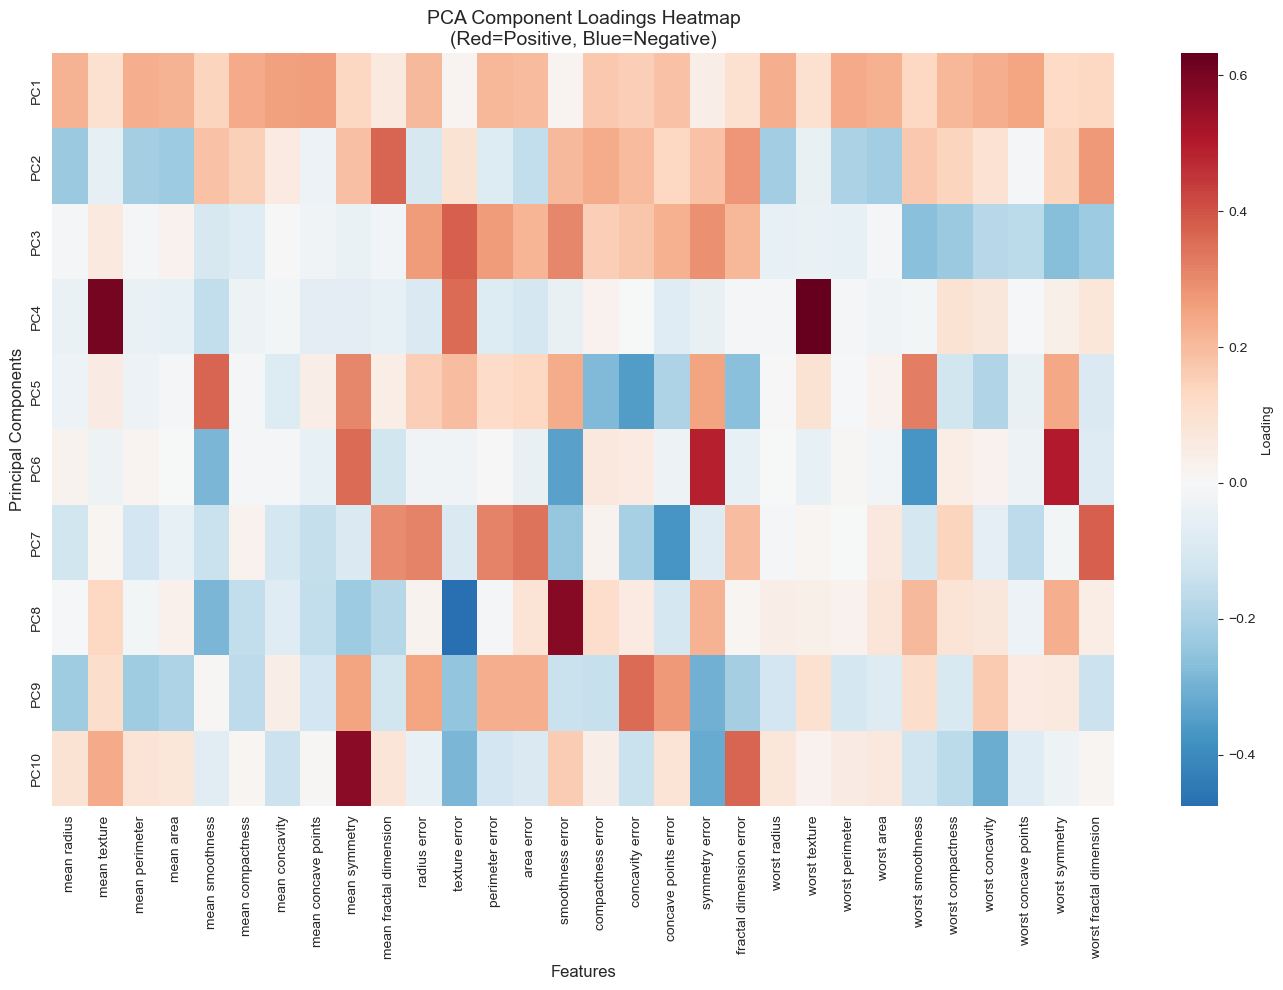


💡 Observations:
  • Each PC uses different feature combinations
  • PCs are orthogonal (different patterns)
  • Later PCs capture more specific patterns


In [50]:
# Heatmap of first 10 PCs
plt.figure(figsize=(14, 10))
sns.heatmap(pca_full.components_[:10, :], 
            cmap='RdBu_r',
            center=0,
            xticklabels=cancer.feature_names,
            yticklabels=[f'PC{i+1}' for i in range(10)],
            cbar_kws={'label': 'Loading'})
plt.xlabel('Features', fontsize=12)
plt.ylabel('Principal Components', fontsize=12)
plt.title('PCA Component Loadings Heatmap\n(Red=Positive, Blue=Negative)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  • Each PC uses different feature combinations")
print("  • PCs are orthogonal (different patterns)")
print("  • Later PCs capture more specific patterns")

## 📊 Section 5: Choosing Number of Components

### 5.1 Elbow Method

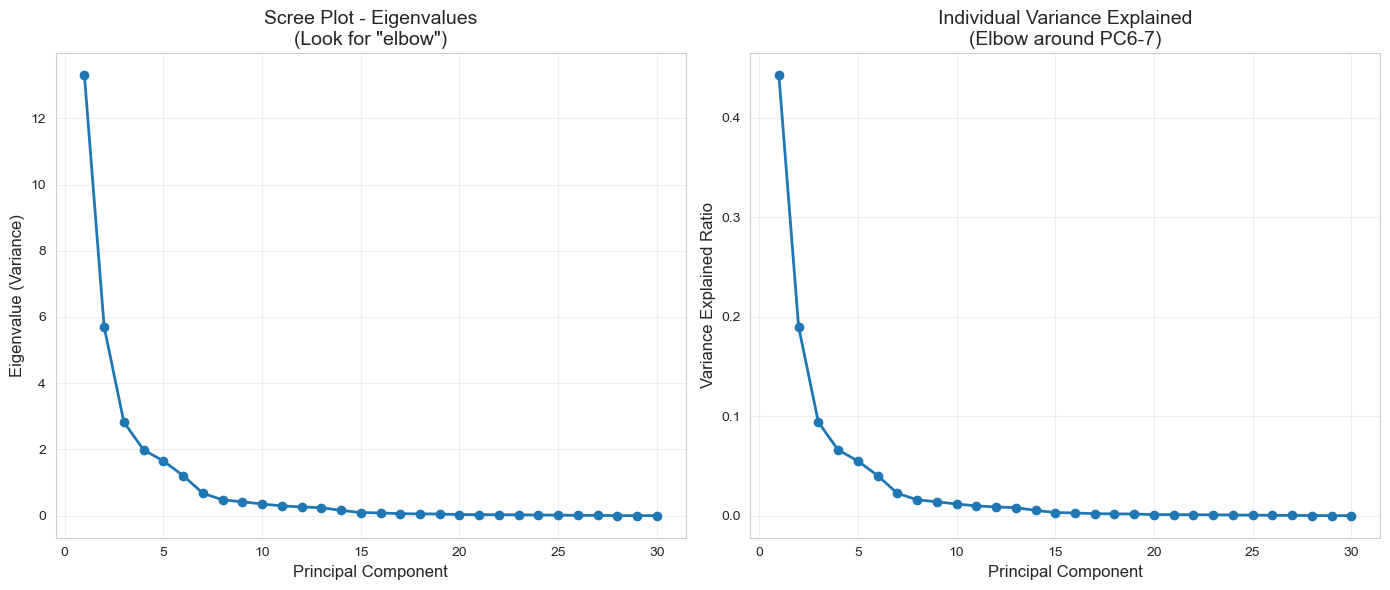


💡 Elbow Method:
  • Look for 'elbow' where variance drops sharply
  • Suggests optimal number of components
  • For this data: elbow around 6-7 components


In [54]:
# Plot explained variance (elbow method)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 31), pca_full.explained_variance_, marker='o', linewidth=2)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Eigenvalue (Variance)', fontsize=12)
plt.title('Scree Plot - Eigenvalues\n(Look for "elbow")', fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 31), pca_full.explained_variance_ratio_, marker='o', linewidth=2)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained Ratio', fontsize=12)
plt.title('Individual Variance Explained\n(Elbow around PC6-7)', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Elbow Method:")
print("  • Look for 'elbow' where variance drops sharply")
print("  • Suggests optimal number of components")
print("  • For this data: elbow around 6-7 components")

### 5.2 Cumulative Variance Threshold

In [57]:
# Different variance thresholds
thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
threshold_results = []

for threshold in thresholds:
    n_components = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= threshold) + 1
    reduction = (1 - n_components / 30) * 100
    threshold_results.append({
        'Threshold': f'{threshold:.0%}',
        'Components': n_components,
        'Reduction': f'{reduction:.1f}%'
    })

threshold_df = pd.DataFrame(threshold_results)

print("\n📊 Components Needed for Different Variance Thresholds:")
print("="*70)
print(threshold_df.to_string(index=False))

print("\n💡 Recommendation:")
print("  • 90-95% variance is typically sufficient")
print("  • Balance: information retention vs dimensionality reduction")


📊 Components Needed for Different Variance Thresholds:
Threshold  Components Reduction
      80%           5     83.3%
      85%           6     80.0%
      90%           7     76.7%
      95%          10     66.7%
      99%          17     43.3%

💡 Recommendation:
  • 90-95% variance is typically sufficient
  • Balance: information retention vs dimensionality reduction


### 5.3 Automated Selection with n_components

In [60]:
# PCA with variance threshold
pca_auto = PCA(n_components=0.95)  # Keep 95% variance
X_cancer_auto = pca_auto.fit_transform(X_cancer_scaled)

print(f"\n📊 Automatic Component Selection (95% variance):")
print(f"Components selected: {pca_auto.n_components_}")
print(f"Original features: 30")
print(f"Reduction: {(1 - pca_auto.n_components_/30)*100:.1f}%")
print(f"Actual variance retained: {pca_auto.explained_variance_ratio_.sum():.4f}")


📊 Automatic Component Selection (95% variance):
Components selected: 10
Original features: 30
Reduction: 66.7%
Actual variance retained: 0.9516


## 📊 Section 6: PCA for Machine Learning

### 6.1 Classification: With vs Without PCA

In [64]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer_scaled, y_cancer, test_size=0.3, random_state=42
)

print("\n📊 Breast Cancer Classification Experiment")
print("="*70)

# Baseline: Logistic Regression without PCA
lr_baseline = LogisticRegression(random_state=42, max_iter=10000)
lr_baseline.fit(X_train, y_train)
baseline_acc = lr_baseline.score(X_test, y_test)

print(f"\n1. Baseline (No PCA, 30 features):")
print(f"   Accuracy: {baseline_acc:.4f}")

# With PCA (different components)
pca_components = [2, 5, 10, 15, 20]
pca_results = []

for n_comp in pca_components:
    # Apply PCA
    pca_temp = PCA(n_components=n_comp)
    X_train_pca = pca_temp.fit_transform(X_train)
    X_test_pca = pca_temp.transform(X_test)
    
    # Train classifier
    lr_pca = LogisticRegression(random_state=42, max_iter=10000)
    lr_pca.fit(X_train_pca, y_train)
    pca_acc = lr_pca.score(X_test_pca, y_test)
    
    variance = pca_temp.explained_variance_ratio_.sum()
    
    pca_results.append({
        'Components': n_comp,
        'Accuracy': pca_acc,
        'Variance': variance,
        'Reduction': f'{(1-n_comp/30)*100:.0f}%'
    })
    
    print(f"\n{len(pca_results)+1}. PCA → {n_comp} components ({variance:.1%} variance, {(1-n_comp/30)*100:.0f}% reduction):")
    print(f"   Accuracy: {pca_acc:.4f}")

pca_results_df = pd.DataFrame(pca_results)


📊 Breast Cancer Classification Experiment

1. Baseline (No PCA, 30 features):
   Accuracy: 0.9825

2. PCA → 2 components (63.2% variance, 93% reduction):
   Accuracy: 0.9708

3. PCA → 5 components (84.5% variance, 83% reduction):
   Accuracy: 0.9883

4. PCA → 10 components (95.2% variance, 67% reduction):
   Accuracy: 0.9942

5. PCA → 15 components (98.7% variance, 50% reduction):
   Accuracy: 0.9883

6. PCA → 20 components (99.6% variance, 33% reduction):
   Accuracy: 0.9883


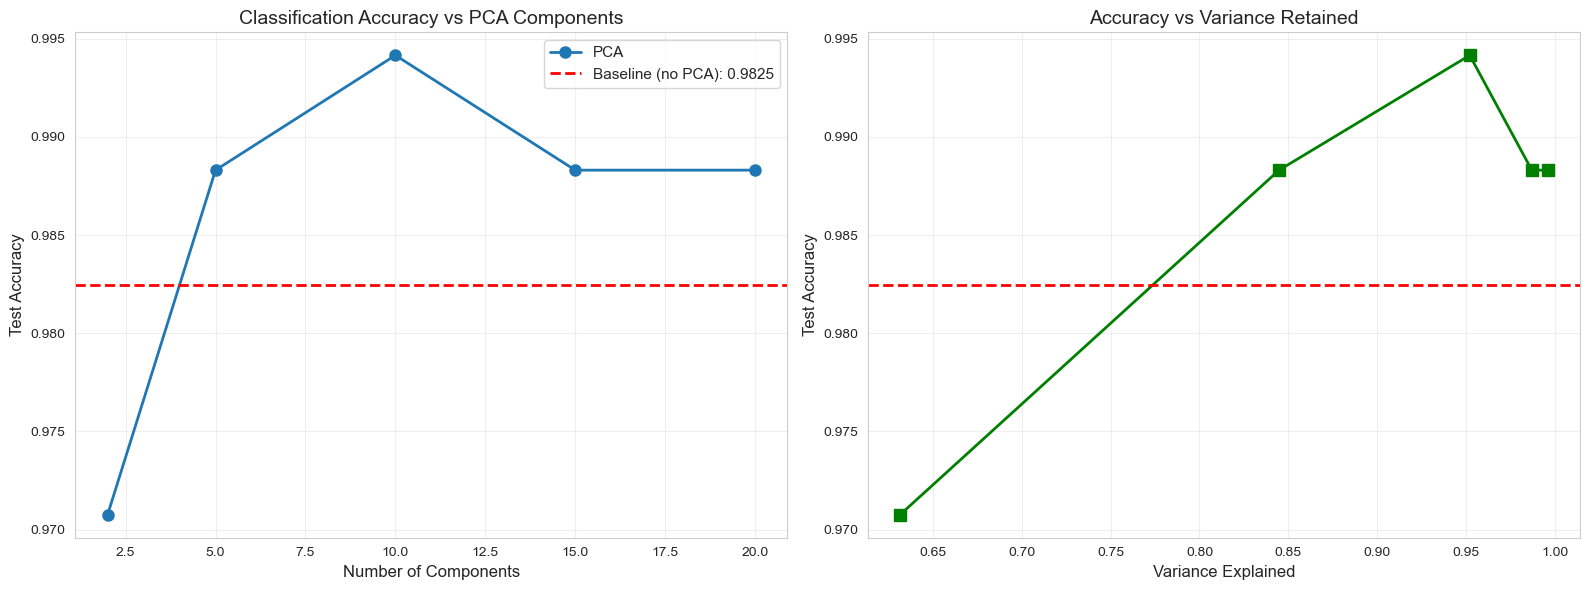


💡 Key Findings:
  • PCA with 10-15 components achieves similar accuracy to baseline
  • 50-67% dimensionality reduction with minimal accuracy loss
  • Trade-off: speed/storage vs accuracy


In [66]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy vs Components
axes[0].plot(pca_results_df['Components'], pca_results_df['Accuracy'], 
             marker='o', linewidth=2, markersize=8, label='PCA')
axes[0].axhline(y=baseline_acc, color='red', linestyle='--', 
                linewidth=2, label=f'Baseline (no PCA): {baseline_acc:.4f}')
axes[0].set_xlabel('Number of Components', fontsize=12)
axes[0].set_ylabel('Test Accuracy', fontsize=12)
axes[0].set_title('Classification Accuracy vs PCA Components', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy vs Variance
axes[1].plot(pca_results_df['Variance'], pca_results_df['Accuracy'], 
             marker='s', linewidth=2, markersize=8, color='green')
axes[1].axhline(y=baseline_acc, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Variance Explained', fontsize=12)
axes[1].set_ylabel('Test Accuracy', fontsize=12)
axes[1].set_title('Accuracy vs Variance Retained', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Findings:")
print("  • PCA with 10-15 components achieves similar accuracy to baseline")
print("  • 50-67% dimensionality reduction with minimal accuracy loss")
print("  • Trade-off: speed/storage vs accuracy")

### 6.2 Training Speed Comparison

In [69]:
import time

# Compare training times
print("\n⏱️ Training Speed Comparison:")
print("="*70)

# Baseline (no PCA)
start = time.time()
lr_baseline = LogisticRegression(random_state=42, max_iter=10000)
lr_baseline.fit(X_train, y_train)
baseline_time = time.time() - start

print(f"\n1. Baseline (30 features): {baseline_time:.4f} seconds")

# With PCA
for n_comp in [5, 10, 15]:
    pca_temp = PCA(n_components=n_comp)
    X_train_pca = pca_temp.fit_transform(X_train)
    
    start = time.time()
    lr_pca = LogisticRegression(random_state=42, max_iter=10000)
    lr_pca.fit(X_train_pca, y_train)
    pca_time = time.time() - start
    
    speedup = baseline_time / pca_time
    print(f"{len([5,10,15][:([5,10,15].index(n_comp)+1)])+1}. PCA {n_comp} components: {pca_time:.4f} seconds (→ {speedup:.1f}x speedup)")

print("\n💡 PCA reduces training time with fewer features!")


⏱️ Training Speed Comparison:

1. Baseline (30 features): 0.0235 seconds
2. PCA 5 components: 0.0070 seconds (→ 3.4x speedup)
3. PCA 10 components: 0.0060 seconds (→ 3.9x speedup)
4. PCA 15 components: 0.0070 seconds (→ 3.4x speedup)

💡 PCA reduces training time with fewer features!


### 6.3 PCA in Pipeline

In [72]:
# Create pipeline with PCA
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

# Train pipeline
pipeline_pca.fit(X_cancer, y_cancer)

# Cross-validation
cv_scores = cross_val_score(pipeline_pca, X_cancer, y_cancer, cv=5)

print("\n📊 PCA Pipeline Performance:")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"Components used: {pipeline_pca.named_steps['pca'].n_components_}")

print("\n✅ Pipeline ensures proper train-test separation!")


📊 PCA Pipeline Performance:
Cross-validation scores: [0.99122807 0.97368421 0.98245614 0.97368421 0.98230088]
Mean CV accuracy: 0.9807 (±0.0066)
Components used: 10

✅ Pipeline ensures proper train-test separation!


## 📊 Section 7: PCA on Image Data (Digits)

### 7.1 Visualizing Digit Variance

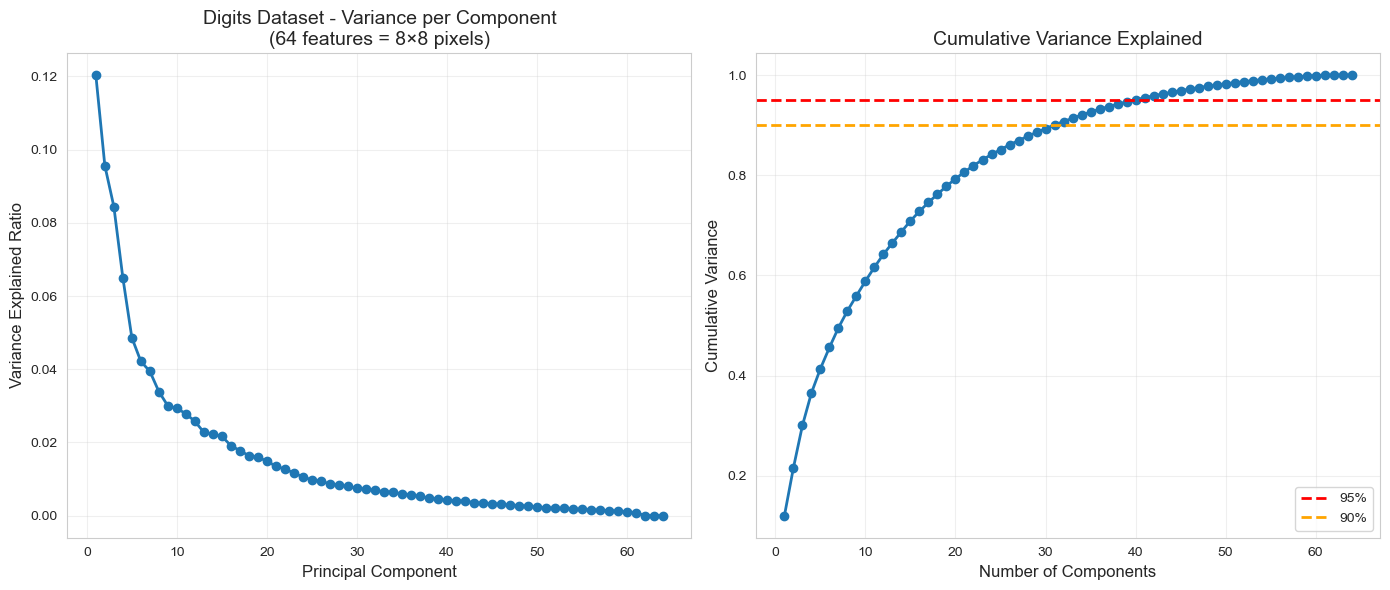


📊 Digits Dataset Dimensionality Reduction:
Original features: 64 pixels
For 90% variance: 31 components (→ 51.6% reduction)
For 95% variance: 40 components (→ 37.5% reduction)


In [76]:
# Apply PCA to digits
pca_digits = PCA()
pca_digits.fit(X_digits_scaled)

# Plot variance
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 65), pca_digits.explained_variance_ratio_, marker='o', linewidth=2)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained Ratio', fontsize=12)
plt.title('Digits Dataset - Variance per Component\n(64 features = 8×8 pixels)', fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 65), np.cumsum(pca_digits.explained_variance_ratio_), marker='o', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95%', linewidth=2)
plt.axhline(y=0.90, color='orange', linestyle='--', label='90%', linewidth=2)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance', fontsize=12)
plt.title('Cumulative Variance Explained', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

n_90_digits = np.argmax(np.cumsum(pca_digits.explained_variance_ratio_) >= 0.90) + 1
n_95_digits = np.argmax(np.cumsum(pca_digits.explained_variance_ratio_) >= 0.95) + 1

print(f"\n📊 Digits Dataset Dimensionality Reduction:")
print(f"Original features: 64 pixels")
print(f"For 90% variance: {n_90_digits} components (→ {(1-n_90_digits/64)*100:.1f}% reduction)")
print(f"For 95% variance: {n_95_digits} components (→ {(1-n_95_digits/64)*100:.1f}% reduction)")

### 7.2 Visualizing Principal Components as Images

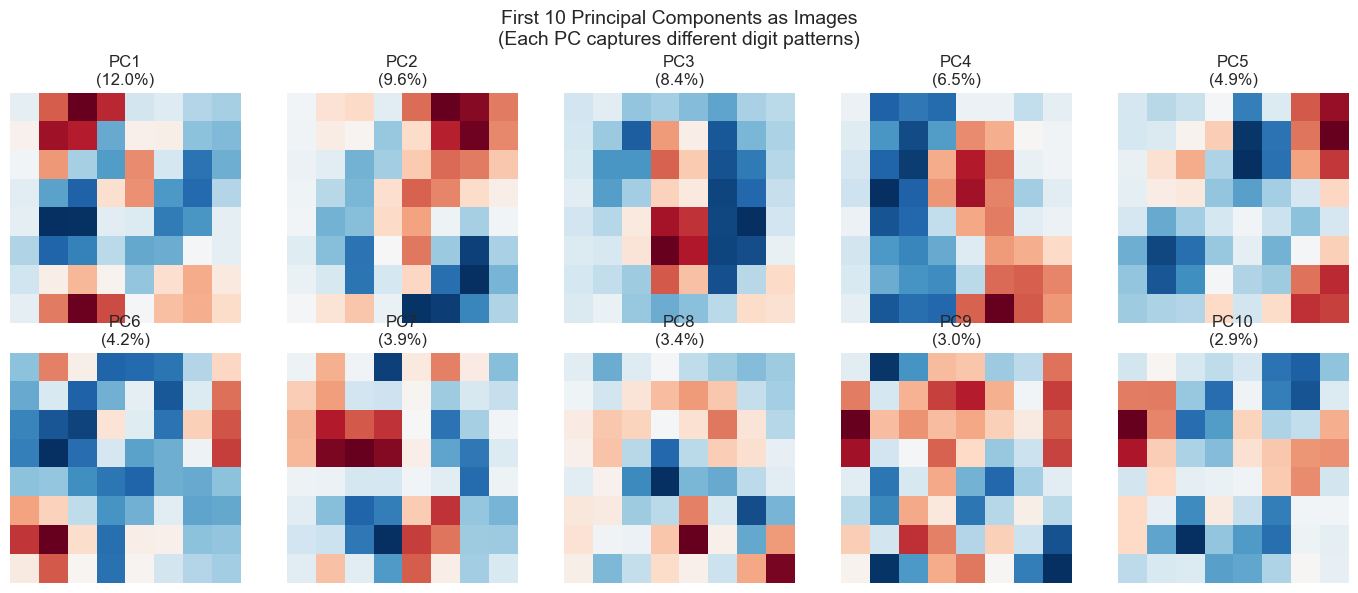


💡 Interpretation:
  • PC1: Overall brightness/intensity
  • PC2-10: Edge patterns, curves, specific digit features
  • Each PC represents a 'basis image'
  • Any digit = weighted combination of these basis images


In [79]:
# Visualize first 10 principal components as images
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

for i, ax in enumerate(axes.flat):
    # Reshape component to 8x8 image
    component_image = pca_digits.components_[i].reshape(8, 8)
    ax.imshow(component_image, cmap='RdBu_r')
    ax.set_title(f'PC{i+1}\n({pca_digits.explained_variance_ratio_[i]:.1%})')
    ax.axis('off')

plt.suptitle('First 10 Principal Components as Images\n(Each PC captures different digit patterns)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("  • PC1: Overall brightness/intensity")
print("  • PC2-10: Edge patterns, curves, specific digit features")
print("  • Each PC represents a 'basis image'")
print("  • Any digit = weighted combination of these basis images")

### 7.3 2D Visualization of Digits

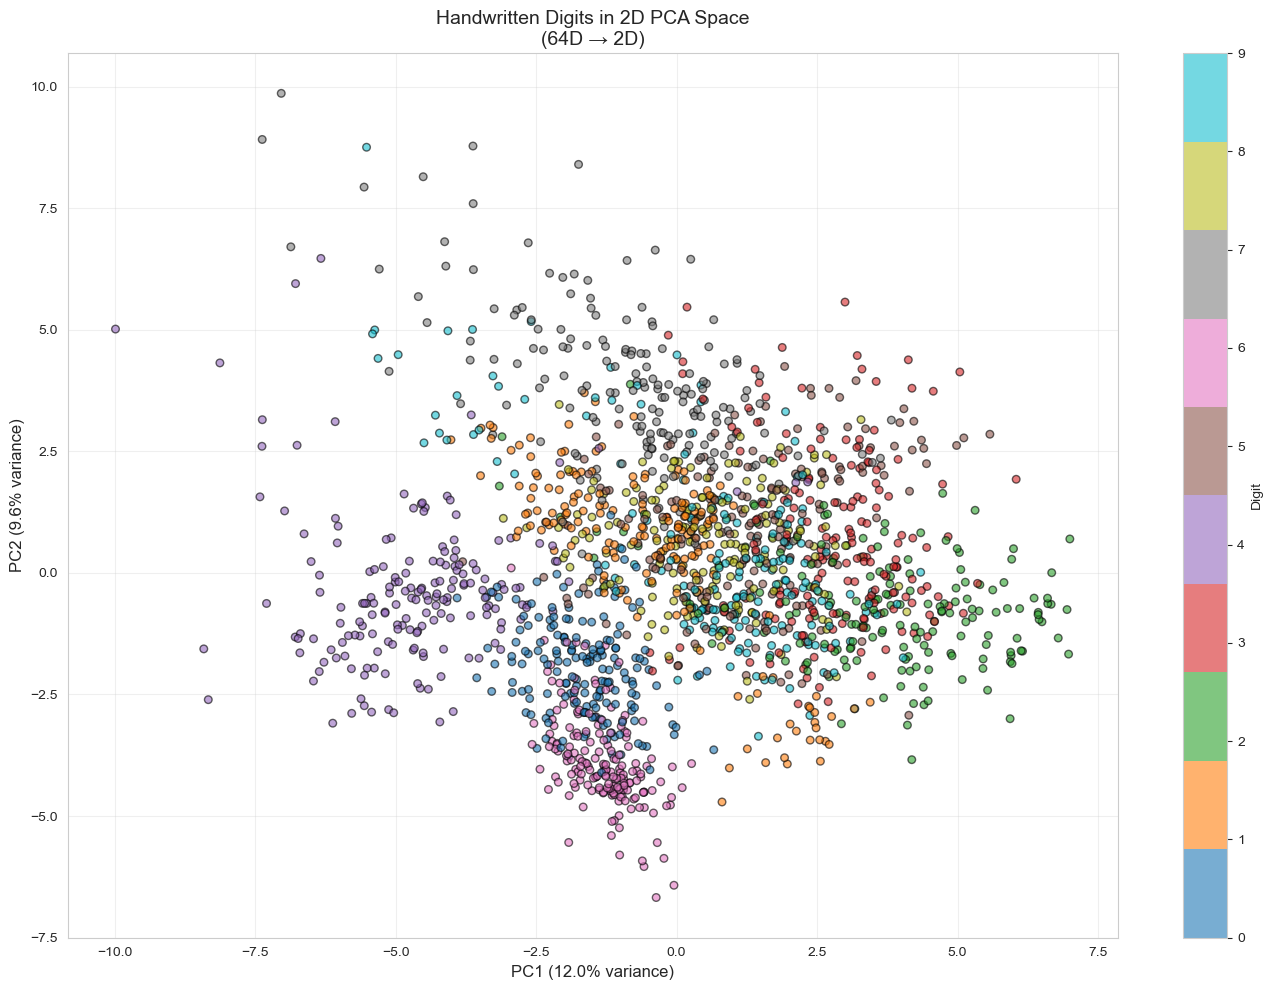


💡 Observations:
  • Different digits cluster in different regions
  • Some overlap (e.g., 4 and 9 are similar)
  • 2 components capture ~30% variance (enough for visualization)


In [82]:
# Project to 2D
pca_digits_2d = PCA(n_components=2)
X_digits_pca_2d = pca_digits_2d.fit_transform(X_digits_scaled)

plt.figure(figsize=(14, 10))
scatter = plt.scatter(X_digits_pca_2d[:, 0], X_digits_pca_2d[:, 1], 
                     c=y_digits, cmap='tab10', 
                     alpha=0.6, edgecolors='black', s=30)
plt.xlabel(f'PC1 ({pca_digits_2d.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_digits_2d.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('Handwritten Digits in 2D PCA Space\n(64D → 2D)', fontsize=14)
plt.colorbar(scatter, label='Digit', ticks=range(10))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  • Different digits cluster in different regions")
print("  • Some overlap (e.g., 4 and 9 are similar)")
print("  • 2 components capture ~30% variance (enough for visualization)")

### 7.4 Classification Performance on Digits

In [85]:
# Compare classifiers with different PCA components
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_digits_scaled, y_digits, test_size=0.3, random_state=42
)

print("\n📊 Digit Classification: Impact of PCA")
print("="*70)

# Baseline (no PCA)
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(X_train_d, y_train_d)
baseline_acc_d = rf_baseline.score(X_test_d, y_test_d)

print(f"\n1. Baseline Random Forest (64 features):")
print(f"   Accuracy: {baseline_acc_d:.4f}")

# With PCA
components_test = [10, 20, 30, 40, 50]
for n_comp in components_test:
    pca_temp = PCA(n_components=n_comp)
    X_train_pca_d = pca_temp.fit_transform(X_train_d)
    X_test_pca_d = pca_temp.transform(X_test_d)
    
    rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_pca.fit(X_train_pca_d, y_train_d)
    pca_acc_d = rf_pca.score(X_test_pca_d, y_test_d)
    
    variance_d = pca_temp.explained_variance_ratio_.sum()
    reduction_d = (1 - n_comp/64) * 100
    
    print(f"\n{components_test.index(n_comp)+2}. PCA {n_comp} components ({variance_d:.1%} variance, {reduction_d:.0f}% reduction):")
    print(f"   Accuracy: {pca_acc_d:.4f}")

print("\n💡 Finding: 30-40 components retain performance with significant reduction!")


📊 Digit Classification: Impact of PCA

1. Baseline Random Forest (64 features):
   Accuracy: 0.9741

2. PCA 10 components (58.9% variance, 84% reduction):
   Accuracy: 0.9259

3. PCA 20 components (79.9% variance, 69% reduction):
   Accuracy: 0.9519

4. PCA 30 components (89.8% variance, 53% reduction):
   Accuracy: 0.9537

5. PCA 40 components (95.4% variance, 38% reduction):
   Accuracy: 0.9519

6. PCA 50 components (98.4% variance, 22% reduction):
   Accuracy: 0.9574

💡 Finding: 30-40 components retain performance with significant reduction!


## 📊 Section 8: Reconstruction and Noise Reduction

### 8.1 Image Reconstruction from PCA

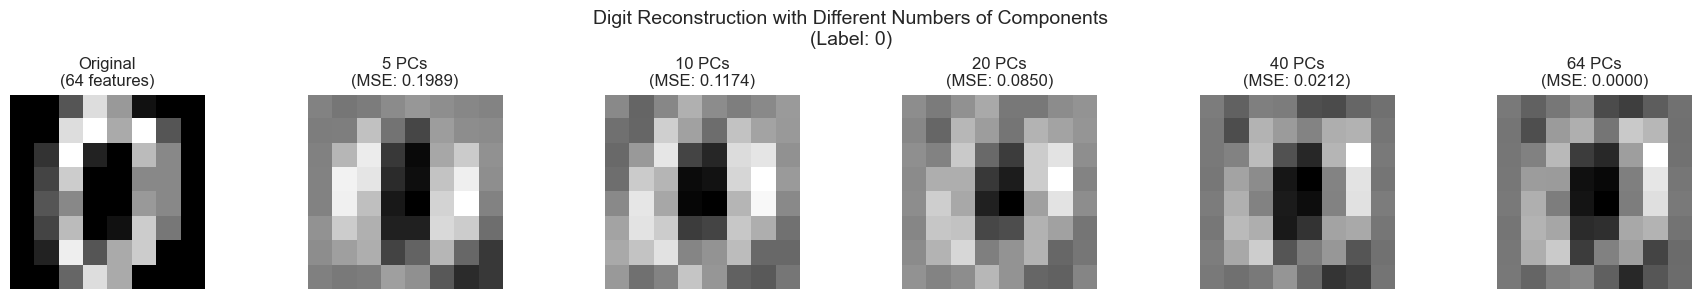


💡 Observations:
  • 5 PCs: Very blurry, basic shape
  • 10 PCs: Recognizable digit
  • 20 PCs: Good reconstruction
  • 40 PCs: Nearly perfect
  • 64 PCs: Perfect (all components)


In [89]:
# Select a digit to reconstruct
digit_idx = 0
original_digit = digits.images[digit_idx]
original_scaled = X_digits_scaled[digit_idx].reshape(1, -1)

# Reconstruct with different numbers of components
n_components_list = [5, 10, 20, 40, 64]

fig, axes = plt.subplots(1, len(n_components_list) + 1, figsize=(18, 3))

# Original
axes[0].imshow(original_digit, cmap='gray')
axes[0].set_title(f'Original\n(64 features)')
axes[0].axis('off')

# Reconstructions
for i, n_comp in enumerate(n_components_list):
    pca_temp = PCA(n_components=n_comp)
    pca_temp.fit(X_digits_scaled)
    
    # Transform and inverse transform
    transformed = pca_temp.transform(original_scaled)
    reconstructed = pca_temp.inverse_transform(transformed)
    reconstructed_image = reconstructed.reshape(8, 8)
    
    # Calculate reconstruction error
    mse = np.mean((original_scaled - reconstructed)**2)
    
    axes[i+1].imshow(reconstructed_image, cmap='gray')
    axes[i+1].set_title(f'{n_comp} PCs\n(MSE: {mse:.4f})')
    axes[i+1].axis('off')

plt.suptitle(f'Digit Reconstruction with Different Numbers of Components\n(Label: {y_digits[digit_idx]})', 
             fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  • 5 PCs: Very blurry, basic shape")
print("  • 10 PCs: Recognizable digit")
print("  • 20 PCs: Good reconstruction")
print("  • 40 PCs: Nearly perfect")
print("  • 64 PCs: Perfect (all components)")

### 8.2 Reconstruction Error Analysis

In [127]:
# Compute reconstruction error for different components
components_range = range(1, 65)
reconstruction_errors = []

# Use first 100 samples
sample_size = 100
X_sample = X_digits_scaled[:sample_size]

for n_comp in components_range:
    pca_temp = PCA(n_components=n_comp)
    X_transformed = pca_temp.fit_transform(X_sample)
    X_reconstructed = pca_temp.inverse_transform(X_transformed)
    
    mse = np.mean((X_sample - X_reconstructed)**2)
    reconstruction_errors.append(mse)

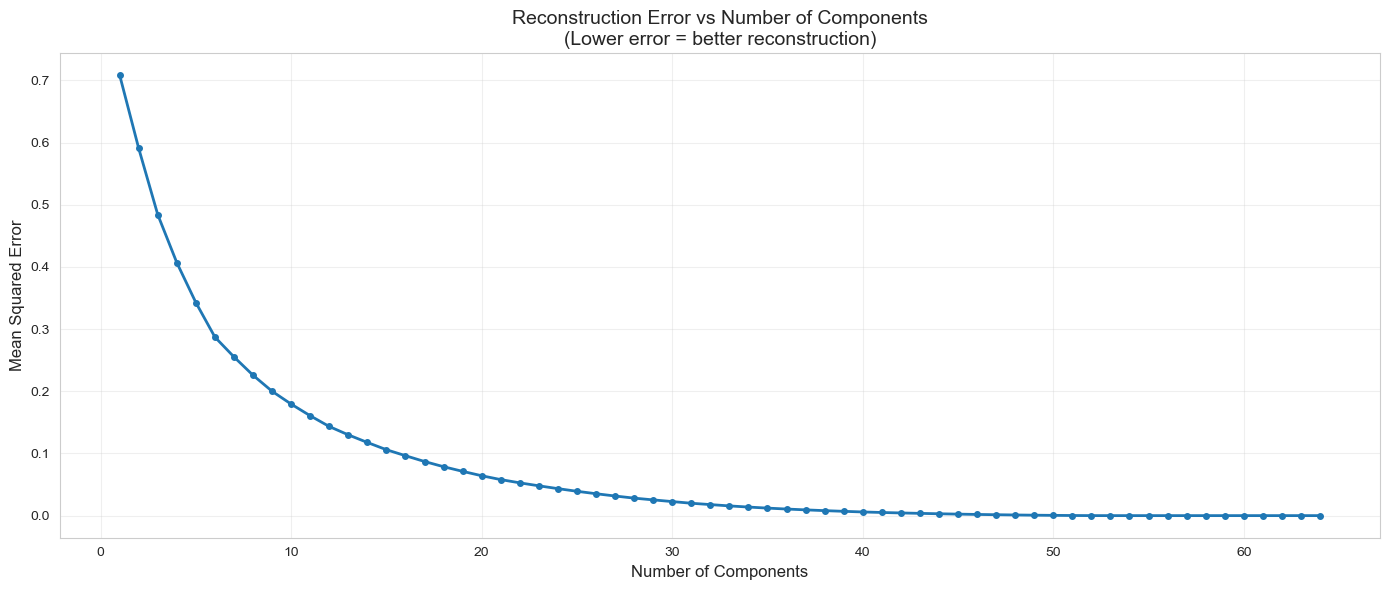


📊 Reconstruction Error Analysis:
With 10 components: MSE = 0.179404
With 20 components: MSE = 0.064145
With 40 components: MSE = 0.005892
With 64 components: MSE = 0.000000 (perfect)


In [129]:
# Plot reconstruction error
plt.figure(figsize=(14, 6))
plt.plot(components_range, reconstruction_errors, linewidth=2, marker='o', markersize=4)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Reconstruction Error vs Number of Components\n(Lower error = better reconstruction)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Reconstruction Error Analysis:")
print(f"With 10 components: MSE = {reconstruction_errors[9]:.6f}")
print(f"With 20 components: MSE = {reconstruction_errors[19]:.6f}")
print(f"With 40 components: MSE = {reconstruction_errors[39]:.6f}")
print(f"With 64 components: MSE = {reconstruction_errors[63]:.6f} (perfect)")

### 8.3 Noise Reduction with PCA

In [132]:
# Add noise to a digit
digit_idx = 10
original_digit = digits.images[digit_idx]
noisy_digit = original_digit + np.random.normal(0, 3, original_digit.shape)
noisy_scaled = (noisy_digit.flatten() - X_digits_scaled.mean(axis=0)) / X_digits_scaled.std(axis=0)

# Denoise using PCA (keep major components, discard noise)
pca_denoise = PCA(n_components=20)
pca_denoise.fit(X_digits_scaled)

noisy_transformed = pca_denoise.transform(noisy_scaled.reshape(1, -1))
denoised = pca_denoise.inverse_transform(noisy_transformed)
denoised_image = denoised.reshape(8, 8)

ValueError: Input X contains infinity or a value too large for dtype('float64').

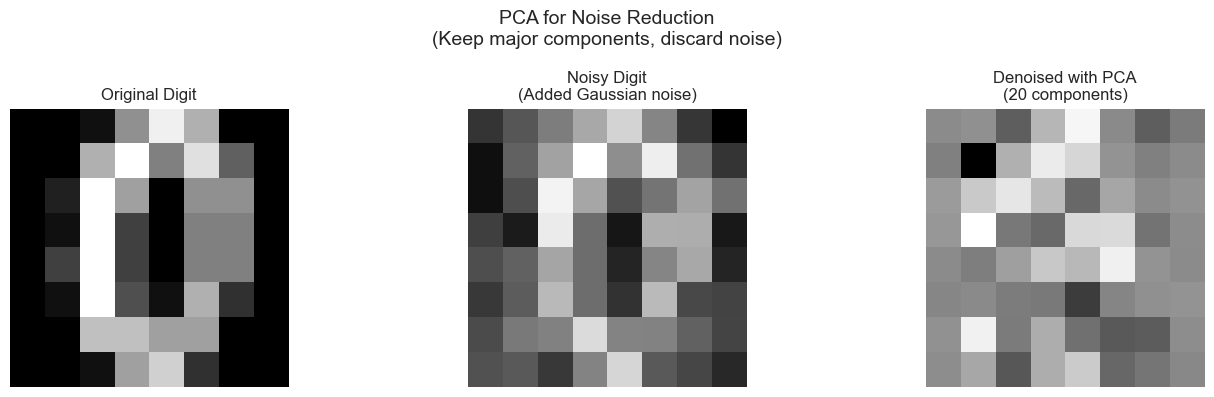


💡 How PCA Denoises:
  • Noise typically has low variance (random)
  • Signal has high variance (structured patterns)
  • PCA keeps high-variance components (signal)
  • Discards low-variance components (noise)


In [134]:
# Visualize denoising
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].imshow(original_digit, cmap='gray')
axes[0].set_title('Original Digit')
axes[0].axis('off')

axes[1].imshow(noisy_digit, cmap='gray')
axes[1].set_title('Noisy Digit\n(Added Gaussian noise)')
axes[1].axis('off')

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title('Denoised with PCA\n(20 components)')
axes[2].axis('off')

plt.suptitle('PCA for Noise Reduction\n(Keep major components, discard noise)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 How PCA Denoises:")
print("  • Noise typically has low variance (random)")
print("  • Signal has high variance (structured patterns)")
print("  • PCA keeps high-variance components (signal)")
print("  • Discards low-variance components (noise)")

## 📊 Section 9: PCA Assumptions and Limitations

### 9.1 Linearity Assumption

In [139]:
# Create nonlinear data (Swiss roll)
from sklearn.datasets import make_swiss_roll

n_samples = 1500
X_swiss, color_swiss = make_swiss_roll(n_samples, noise=0.1, random_state=42)

# Apply PCA
pca_swiss = PCA(n_components=2)
X_swiss_pca = pca_swiss.fit_transform(X_swiss)

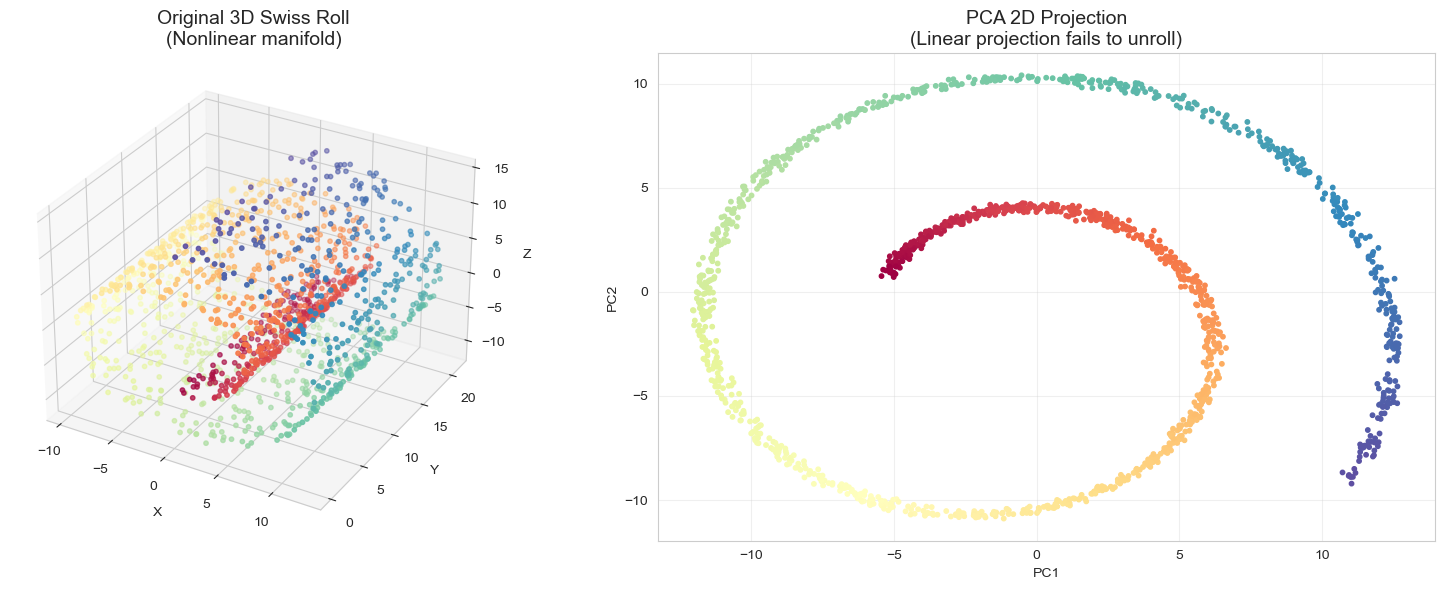


⚠️ PCA Limitation:
  • PCA is LINEAR dimensionality reduction
  • Cannot capture nonlinear structures
  • Swiss roll has nonlinear structure (should unroll)
  • PCA just rotates/projects linearly

✅ Solution: Use nonlinear methods (t-SNE, UMAP, Kernel PCA)


In [141]:
# Visualize limitation
fig = plt.figure(figsize=(16, 6))

# Original 3D data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], 
           c=color_swiss, cmap='Spectral', s=10)
ax1.set_title('Original 3D Swiss Roll\n(Nonlinear manifold)', fontsize=14)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# PCA projection
ax2 = fig.add_subplot(122)
ax2.scatter(X_swiss_pca[:, 0], X_swiss_pca[:, 1], 
           c=color_swiss, cmap='Spectral', s=10)
ax2.set_title('PCA 2D Projection\n(Linear projection fails to unroll)', fontsize=14)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ PCA Limitation:")
print("  • PCA is LINEAR dimensionality reduction")
print("  • Cannot capture nonlinear structures")
print("  • Swiss roll has nonlinear structure (should unroll)")
print("  • PCA just rotates/projects linearly")
print("\n✅ Solution: Use nonlinear methods (t-SNE, UMAP, Kernel PCA)")

### 9.2 Variance ≠ Always Important

In [144]:
# Create example where variance misleads
np.random.seed(42)

# Create classification problem
# Class 0: Centered around (0, 0)
# Class 1: Centered around (0.5, 0.5)
# Add high-variance noise feature

n_per_class = 200
X_class0 = np.random.randn(n_per_class, 2) * 0.3
X_class1 = np.random.randn(n_per_class, 2) * 0.3 + 0.5

# Add high-variance but useless noise feature
noise_feature = np.random.randn(2 * n_per_class, 1) * 5

X_misleading = np.vstack([X_class0, X_class1])
X_misleading = np.hstack([X_misleading, noise_feature])

y_misleading = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])

# Apply PCA
pca_misleading = PCA(n_components=2)
X_misleading_pca = pca_misleading.fit_transform(X_misleading)

print("\n📊 Feature Variance:")
print(f"Feature 1 variance: {X_misleading[:, 0].var():.4f}")
print(f"Feature 2 variance: {X_misleading[:, 1].var():.4f}")
print(f"Feature 3 (noise) variance: {X_misleading[:, 2].var():.4f} ← Highest!")

print(f"\n📊 PCA Variance Explained:")
print(f"PC1: {pca_misleading.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca_misleading.explained_variance_ratio_[1]:.4f}")


📊 Feature Variance:
Feature 1 variance: 0.1444
Feature 2 variance: 0.1453
Feature 3 (noise) variance: 24.5689 ← Highest!

📊 PCA Variance Explained:
PC1: 0.9883
PC2: 0.0081


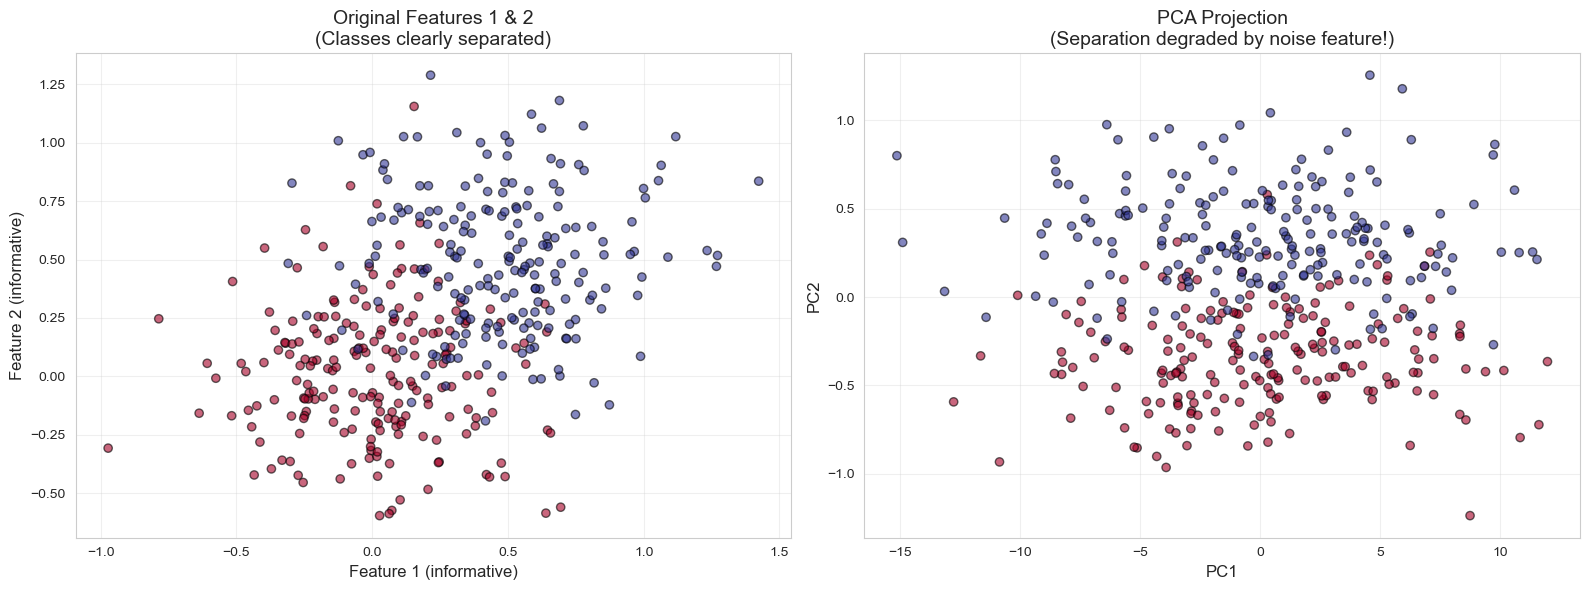


⚠️ Problem:
  • High-variance noise feature dominates PCA
  • Discriminative information (low variance) is lost
  • PCA assumes variance = importance

✅ Solution: Use supervised methods (LDA) for classification


In [146]:
# Visualize the problem
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original features (meaningful)
axes[0].scatter(X_misleading[:, 0], X_misleading[:, 1], 
               c=y_misleading, cmap='RdYlBu', alpha=0.6, edgecolors='black')
axes[0].set_xlabel('Feature 1 (informative)', fontsize=12)
axes[0].set_ylabel('Feature 2 (informative)', fontsize=12)
axes[0].set_title('Original Features 1 & 2\n(Classes clearly separated)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# PCA projection
axes[1].scatter(X_misleading_pca[:, 0], X_misleading_pca[:, 1], 
               c=y_misleading, cmap='RdYlBu', alpha=0.6, edgecolors='black')
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].set_title('PCA Projection\n(Separation degraded by noise feature!)', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ Problem:")
print("  • High-variance noise feature dominates PCA")
print("  • Discriminative information (low variance) is lost")
print("  • PCA assumes variance = importance")
print("\n✅ Solution: Use supervised methods (LDA) for classification")

### 9.3 Scaling Sensitivity

In [149]:
# Demonstrate scaling importance
X_unscaled = df_cancer.drop('target', axis=1).values

# PCA without scaling
pca_unscaled = PCA(n_components=2)
X_cancer_pca_unscaled = pca_unscaled.fit_transform(X_unscaled)

# PCA with scaling
X_cancer_pca_scaled = pca_2d.transform(X_cancer_scaled)

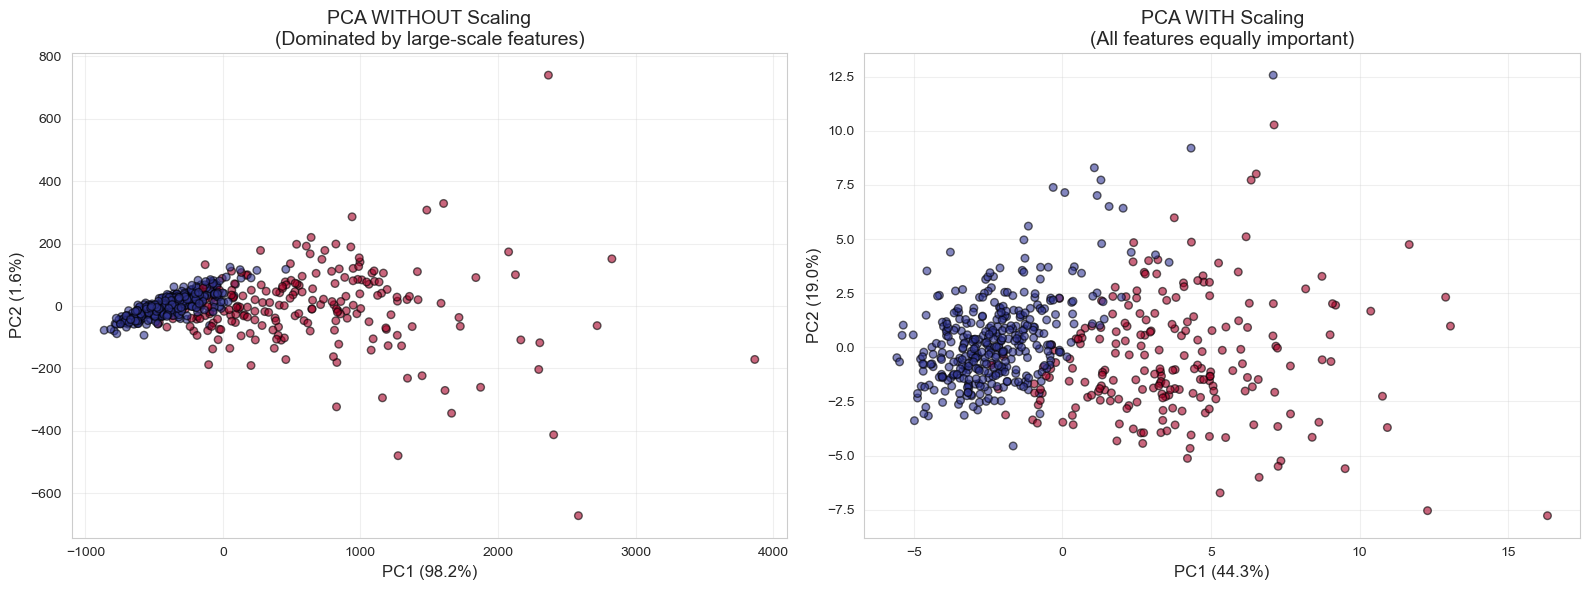


⚠️ Critical Importance of Scaling:
  • Without scaling: Large-scale features dominate
  • With scaling: All features contribute fairly
  • ALWAYS use StandardScaler before PCA!


In [151]:
# Compare
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Without scaling
axes[0].scatter(X_cancer_pca_unscaled[:, 0], X_cancer_pca_unscaled[:, 1], 
               c=y_cancer, cmap='RdYlBu', alpha=0.6, edgecolors='black', s=30)
axes[0].set_xlabel(f'PC1 ({pca_unscaled.explained_variance_ratio_[0]:.1%})', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca_unscaled.explained_variance_ratio_[1]:.1%})', fontsize=12)
axes[0].set_title('PCA WITHOUT Scaling\n(Dominated by large-scale features)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# With scaling
axes[1].scatter(X_cancer_pca_scaled[:, 0], X_cancer_pca_scaled[:, 1], 
               c=y_cancer, cmap='RdYlBu', alpha=0.6, edgecolors='black', s=30)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})', fontsize=12)
axes[1].set_title('PCA WITH Scaling\n(All features equally important)', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ Critical Importance of Scaling:")
print("  • Without scaling: Large-scale features dominate")
print("  • With scaling: All features contribute fairly")
print("  • ALWAYS use StandardScaler before PCA!")

## 📊 Section 10: Advanced PCA Topics

### 10.1 Incremental PCA (for Large Datasets)

In [155]:
from sklearn.decomposition import IncrementalPCA

# Incremental PCA for memory efficiency
ipca = IncrementalPCA(n_components=10, batch_size=100)

# Fit in batches (simulated)
print("\n📊 Incremental PCA:")
print("="*70)
print("Use case: Dataset too large for memory")
print("Solution: Process data in batches")

# Fit on cancer data (as example)
ipca.fit(X_cancer_scaled)
X_cancer_ipca = ipca.transform(X_cancer_scaled)

print(f"\nComponents: {ipca.n_components_}")
print(f"Variance explained: {ipca.explained_variance_ratio_.sum():.4f}")
print("\n💡 Incremental PCA:")
print("  • Memory-efficient for large datasets")
print("  • Processes data in chunks")
print("  • Slight approximation vs regular PCA")


📊 Incremental PCA:
Use case: Dataset too large for memory
Solution: Process data in batches

Components: 10
Variance explained: 0.9502

💡 Incremental PCA:
  • Memory-efficient for large datasets
  • Processes data in chunks
  • Slight approximation vs regular PCA


### 10.2 Sparse PCA

In [158]:
from sklearn.decomposition import SparsePCA

# Sparse PCA (components have many zeros)
spca = SparsePCA(n_components=5, alpha=1.0, random_state=42, max_iter=100)
X_cancer_spca = spca.fit_transform(X_cancer_scaled)

print("\n📊 Sparse PCA:")
print("="*70)

# Compare sparsity
print("\nRegular PCA - PC1 (first 10 loadings):")
print(pca_full.components_[0, :10])
print(f"Non-zero elements: {np.sum(pca_full.components_[0] != 0)}/{len(pca_full.components_[0])}")

print("\nSparse PCA - PC1 (first 10 loadings):")
print(spca.components_[0, :10])
print(f"Non-zero elements: {np.sum(np.abs(spca.components_[0]) > 0.01)}/{len(spca.components_[0])}")

print("\n💡 Sparse PCA:")
print("  • Forces many loadings to zero")
print("  • More interpretable (fewer features per component)")
print("  • Trade-off: Slightly less variance explained")


📊 Sparse PCA:

Regular PCA - PC1 (first 10 loadings):
[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335]
Non-zero elements: 30/30

Sparse PCA - PC1 (first 10 loadings):
[ 0.315374    0.00600382  0.31730181  0.31801973  0.01267605  0.08721639
  0.16536479  0.2300363   0.         -0.15073936]
Non-zero elements: 22/30

💡 Sparse PCA:
  • Forces many loadings to zero
  • More interpretable (fewer features per component)
  • Trade-off: Slightly less variance explained


### 10.3 Kernel PCA (Nonlinear)

In [161]:
from sklearn.decomposition import KernelPCA

# Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, random_state=42)
X_cancer_kpca = kpca.fit_transform(X_cancer_scaled)

print("\n📊 Kernel PCA:")
print("="*70)
print("Type: Nonlinear dimensionality reduction")
print("Kernels available: 'linear', 'poly', 'rbf', 'sigmoid'")


📊 Kernel PCA:
Type: Nonlinear dimensionality reduction
Kernels available: 'linear', 'poly', 'rbf', 'sigmoid'


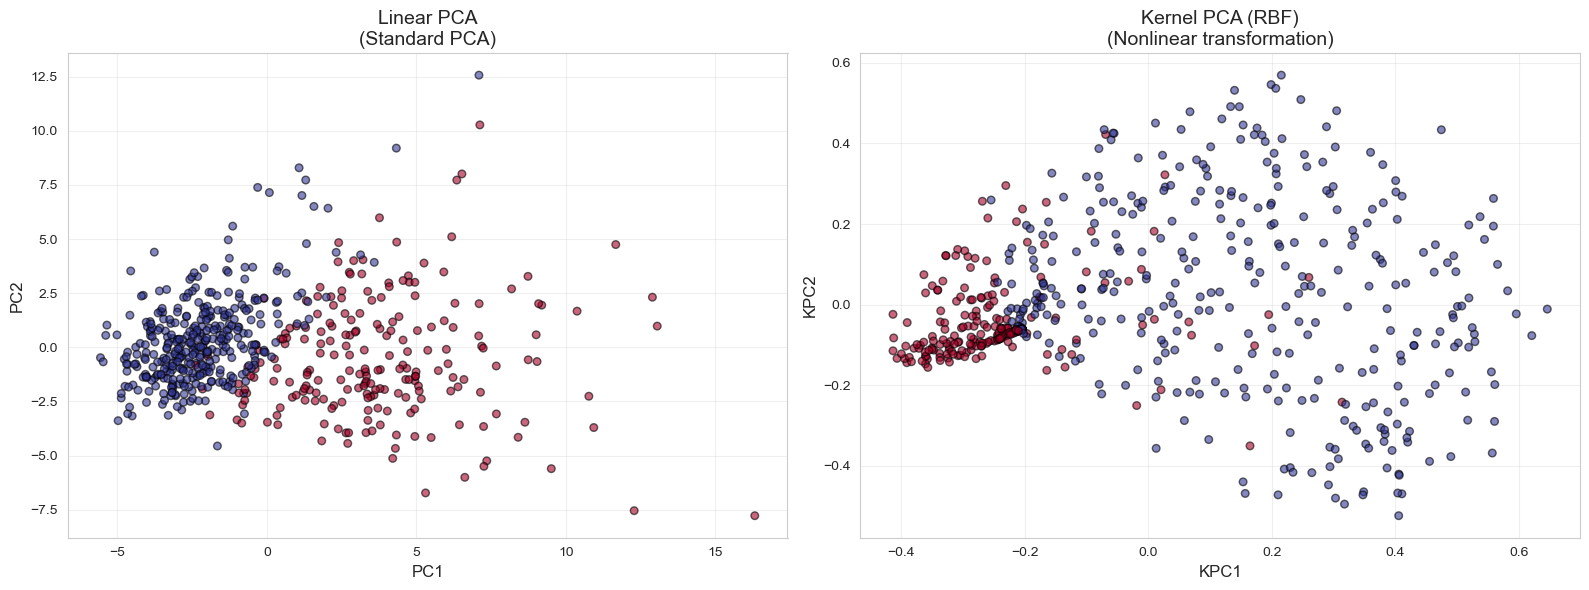


💡 Kernel PCA:
  • Can capture nonlinear relationships
  • Uses kernel trick (like SVM)
  • More computationally expensive
  • No inverse transform for all kernels


In [163]:
# Compare Linear PCA vs Kernel PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear PCA
axes[0].scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], 
               c=y_cancer, cmap='RdYlBu', alpha=0.6, edgecolors='black', s=30)
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].set_title('Linear PCA\n(Standard PCA)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Kernel PCA
axes[1].scatter(X_cancer_kpca[:, 0], X_cancer_kpca[:, 1], 
               c=y_cancer, cmap='RdYlBu', alpha=0.6, edgecolors='black', s=30)
axes[1].set_xlabel('KPC1', fontsize=12)
axes[1].set_ylabel('KPC2', fontsize=12)
axes[1].set_title('Kernel PCA (RBF)\n(Nonlinear transformation)', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Kernel PCA:")
print("  • Can capture nonlinear relationships")
print("  • Uses kernel trick (like SVM)")
print("  • More computationally expensive")
print("  • No inverse transform for all kernels")

## 📊 Section 11: Real-World Applications

### 11.1 Face Recognition with PCA (Eigenfaces)

In [167]:
# Load faces dataset
try:
    faces = fetch_olivetti_faces(shuffle=True, random_state=42)
    X_faces = faces.data
    y_faces = faces.target
    
    print("\n📊 Olivetti Faces Dataset:")
    print(f"Shape: {X_faces.shape}")
    print(f"Number of people: {len(np.unique(y_faces))}")
    print(f"Images per person: {len(y_faces) // len(np.unique(y_faces))}")
    print(f"Image size: 64×64 pixels = 4096 features")
    
    faces_available = True
except:
    print("\n⚠️ Could not load Olivetti faces dataset")
    faces_available = False

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\rohan\scikit_learn_data

📊 Olivetti Faces Dataset:
Shape: (400, 4096)
Number of people: 40
Images per person: 10
Image size: 64×64 pixels = 4096 features


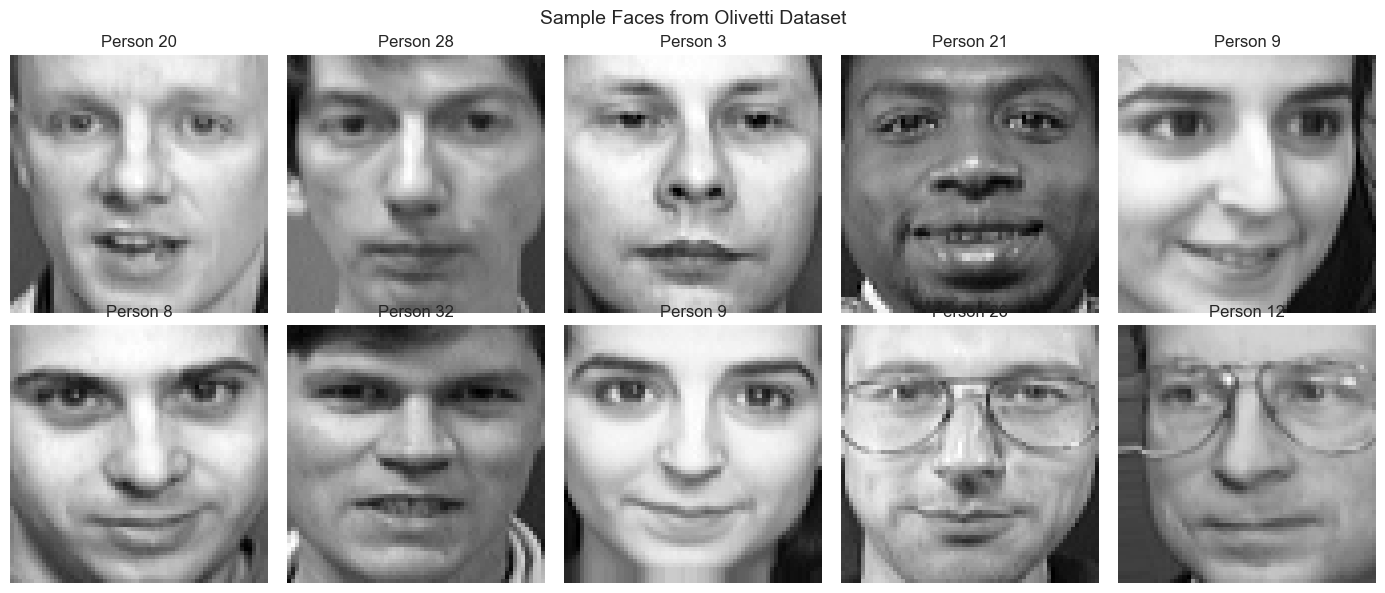

In [169]:
if faces_available:
    # Show sample faces
    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces.images[i], cmap='gray')
        ax.set_title(f"Person {y_faces[i]}")
        ax.axis('off')
    plt.suptitle("Sample Faces from Olivetti Dataset", fontsize=14)
    plt.tight_layout()
    plt.show()

In [171]:
if faces_available:
    # Apply PCA to faces
    n_components_faces = 150
    pca_faces = PCA(n_components=n_components_faces, whiten=True, random_state=42)
    X_faces_pca = pca_faces.fit_transform(X_faces)
    
    print(f"\n📊 PCA on Faces:")
    print(f"Original dimensions: {X_faces.shape[1]} (64×64 pixels)")
    print(f"Reduced dimensions: {n_components_faces}")
    print(f"Variance explained: {pca_faces.explained_variance_ratio_.sum():.4f}")
    print(f"Dimensionality reduction: {(1 - n_components_faces/X_faces.shape[1])*100:.1f}%")


📊 PCA on Faces:
Original dimensions: 4096 (64×64 pixels)
Reduced dimensions: 150
Variance explained: 0.9629
Dimensionality reduction: 96.3%


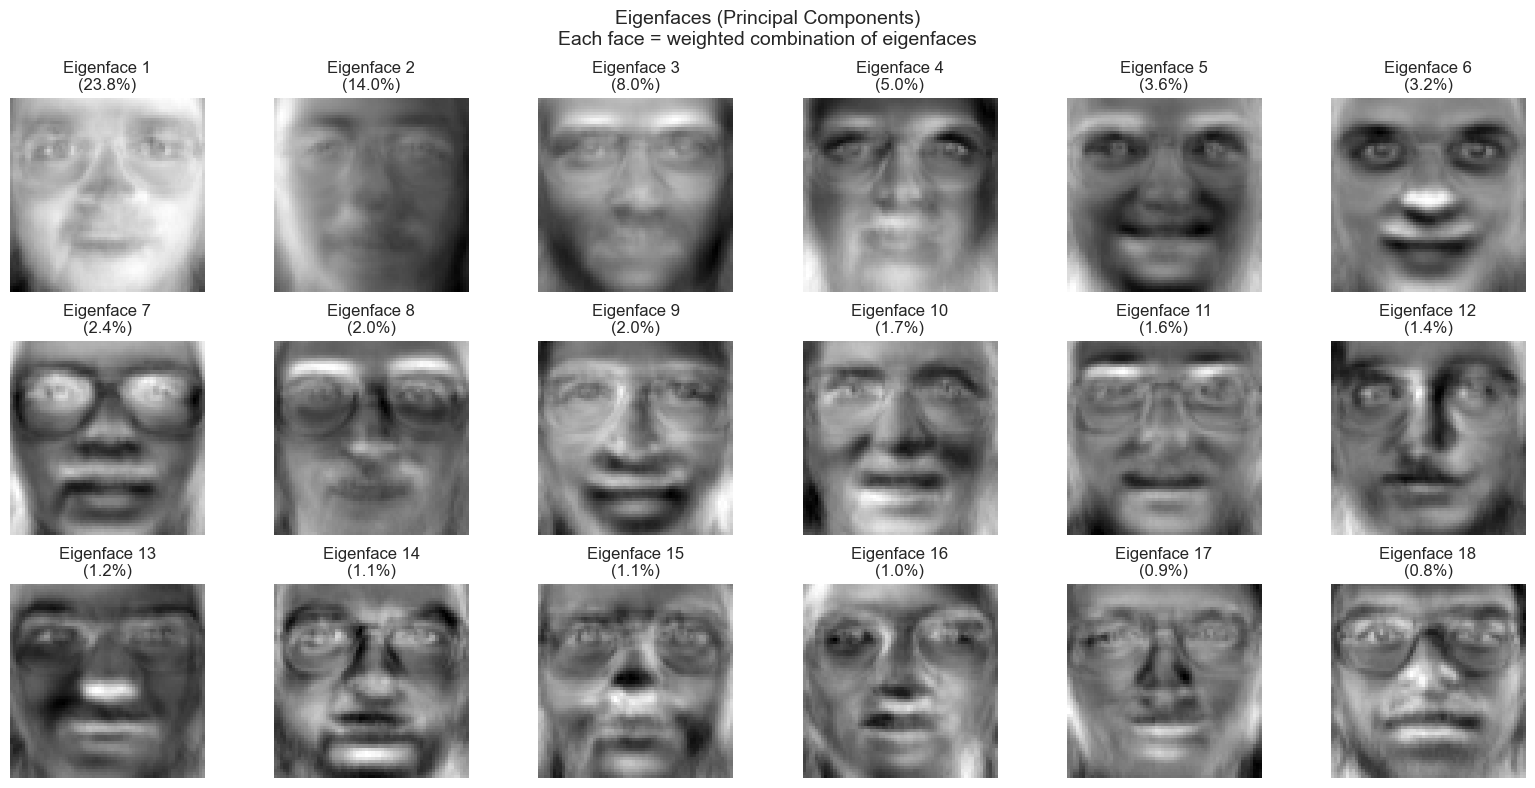


💡 Eigenfaces:
  • Each eigenface is a principal component
  • Captures different facial features (lighting, shape, etc.)
  • Any face can be reconstructed from eigenfaces
  • Used in face recognition systems


In [173]:
if faces_available:
    # Visualize eigenfaces
    fig, axes = plt.subplots(3, 6, figsize=(16, 8))
    for i, ax in enumerate(axes.flat):
        if i < len(pca_faces.components_):
            eigenface = pca_faces.components_[i].reshape(64, 64)
            ax.imshow(eigenface, cmap='gray')
            ax.set_title(f'Eigenface {i+1}\n({pca_faces.explained_variance_ratio_[i]:.1%})')
            ax.axis('off')
    plt.suptitle('Eigenfaces (Principal Components)\nEach face = weighted combination of eigenfaces', 
                 fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Eigenfaces:")
    print("  • Each eigenface is a principal component")
    print("  • Captures different facial features (lighting, shape, etc.)")
    print("  • Any face can be reconstructed from eigenfaces")
    print("  • Used in face recognition systems")

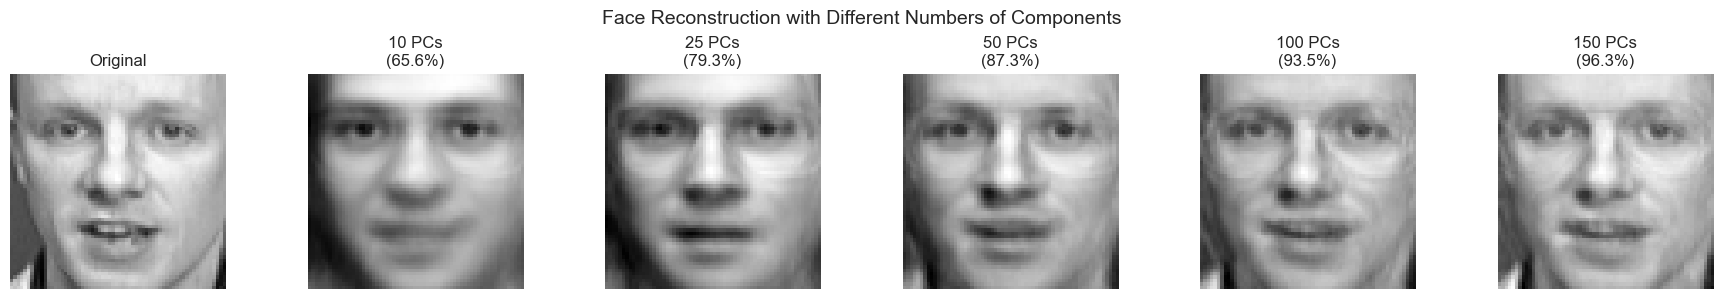

In [175]:
if faces_available:
    # Face reconstruction with different components
    face_idx = 0
    original_face = faces.images[face_idx]
    
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))
    
    # Original
    axes[0].imshow(original_face, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Reconstructions
    n_components_test = [10, 25, 50, 100, 150]
    for i, n_comp in enumerate(n_components_test):
        pca_temp = PCA(n_components=n_comp)
        pca_temp.fit(X_faces)
        
        face_transformed = pca_temp.transform(X_faces[face_idx].reshape(1, -1))
        face_reconstructed = pca_temp.inverse_transform(face_transformed)
        
        axes[i+1].imshow(face_reconstructed.reshape(64, 64), cmap='gray')
        axes[i+1].set_title(f'{n_comp} PCs\n({pca_temp.explained_variance_ratio_.sum():.1%})')
        axes[i+1].axis('off')
    
    plt.suptitle('Face Reconstruction with Different Numbers of Components', fontsize=14)
    plt.tight_layout()
    plt.show()

### 11.2 Feature Engineering: Creating New Features

In [178]:
# Use PCA components as features for classification
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer_scaled, y_cancer, test_size=0.3, random_state=42
)

# Create features from different numbers of components
pca_features_results = []

for n_comp in [2, 5, 10, 15, 20, 25, 30]:
    # PCA transformation
    pca_temp = PCA(n_components=n_comp)
    X_train_pca = pca_temp.fit_transform(X_train)
    X_test_pca = pca_temp.transform(X_test)
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_pca, y_train)
    accuracy = rf.score(X_test_pca, y_test)
    
    pca_features_results.append({
        'Components': n_comp,
        'Accuracy': accuracy,
        'Variance': pca_temp.explained_variance_ratio_.sum()
    })

pca_features_df = pd.DataFrame(pca_features_results)

print("\n📊 PCA Features for Random Forest:")
print("="*70)
print(pca_features_df.to_string(index=False))


📊 PCA Features for Random Forest:
 Components  Accuracy  Variance
          2  0.959064  0.631609
          5  0.964912  0.844770
         10  0.959064  0.952007
         15  0.953216  0.986933
         20  0.947368  0.995828
         25  0.923977  0.999455
         30  0.941520  1.000000


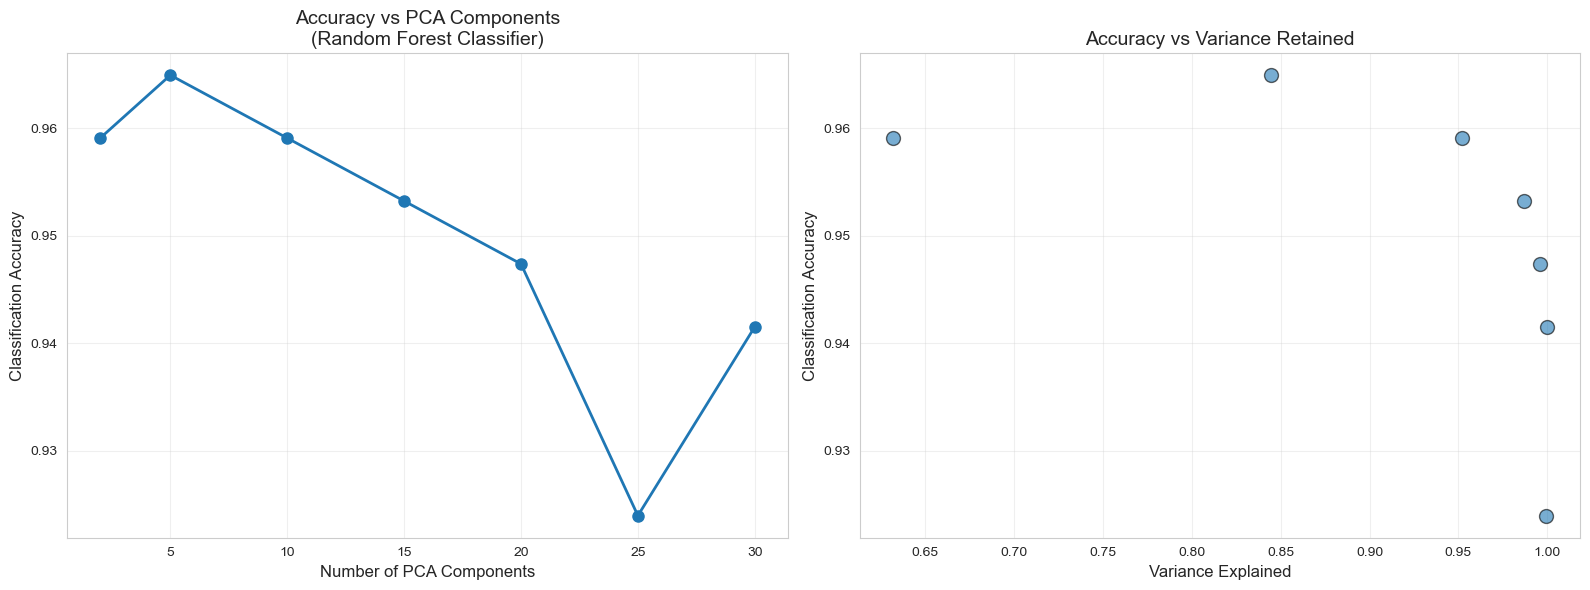

In [180]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(pca_features_df['Components'], pca_features_df['Accuracy'], 
            marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of PCA Components', fontsize=12)
axes[0].set_ylabel('Classification Accuracy', fontsize=12)
axes[0].set_title('Accuracy vs PCA Components\n(Random Forest Classifier)', fontsize=14)
axes[0].grid(True, alpha=0.3)

axes[1].scatter(pca_features_df['Variance'], pca_features_df['Accuracy'], 
               s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('Variance Explained', fontsize=12)
axes[1].set_ylabel('Classification Accuracy', fontsize=12)
axes[1].set_title('Accuracy vs Variance Retained', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 11.3 Data Compression and Storage

In [183]:
# Calculate storage savings
original_size = X_cancer_scaled.nbytes
print("\n📊 Data Compression with PCA:")
print("="*70)

print(f"\nOriginal data size:")
print(f"  Shape: {X_cancer_scaled.shape}")
print(f"  Storage: {original_size / 1024:.2f} KB")

for n_comp in [5, 10, 15, 20]:
    pca_temp = PCA(n_components=n_comp)
    X_compressed = pca_temp.fit_transform(X_cancer_scaled)
    
    # Size of compressed data + PCA model
    compressed_size = X_compressed.nbytes + pca_temp.components_.nbytes
    compression_ratio = original_size / compressed_size
    variance = pca_temp.explained_variance_ratio_.sum()
    
    print(f"\n{n_comp} components ({variance:.1%} variance):")
    print(f"  Compressed size: {compressed_size / 1024:.2f} KB")
    print(f"  Compression ratio: {compression_ratio:.2f}x")
    print(f"  Storage savings: {(1 - 1/compression_ratio)*100:.1f}%")


📊 Data Compression with PCA:

Original data size:
  Shape: (569, 30)
  Storage: 133.36 KB

5 components (84.7% variance):
  Compressed size: 23.40 KB
  Compression ratio: 5.70x
  Storage savings: 82.5%

10 components (95.2% variance):
  Compressed size: 46.80 KB
  Compression ratio: 2.85x
  Storage savings: 64.9%

15 components (98.6% variance):
  Compressed size: 70.20 KB
  Compression ratio: 1.90x
  Storage savings: 47.4%

20 components (99.6% variance):
  Compressed size: 93.59 KB
  Compression ratio: 1.42x
  Storage savings: 29.8%


## 📊 Section 12: Production Pipeline & Best Practices

### 12.1 Complete ML Pipeline with PCA

In [188]:
# Create production pipeline
from sklearn.model_selection import GridSearchCV

pipeline_full = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

# Hyperparameter grid
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'classifier__C': [0.1, 1.0, 10.0]
}

# Grid search
grid_search = GridSearchCV(
    pipeline_full,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("\n🔍 Grid Search with PCA in Pipeline:")
print("="*70)
grid_search.fit(X_cancer, y_cancer)

print(f"\nBest parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV score: {grid_search.best_score_:.4f}")


🔍 Grid Search with PCA in Pipeline:

Best parameters:
  classifier__C: 1.0
  pca__n_components: 10

Best CV score: 0.9807


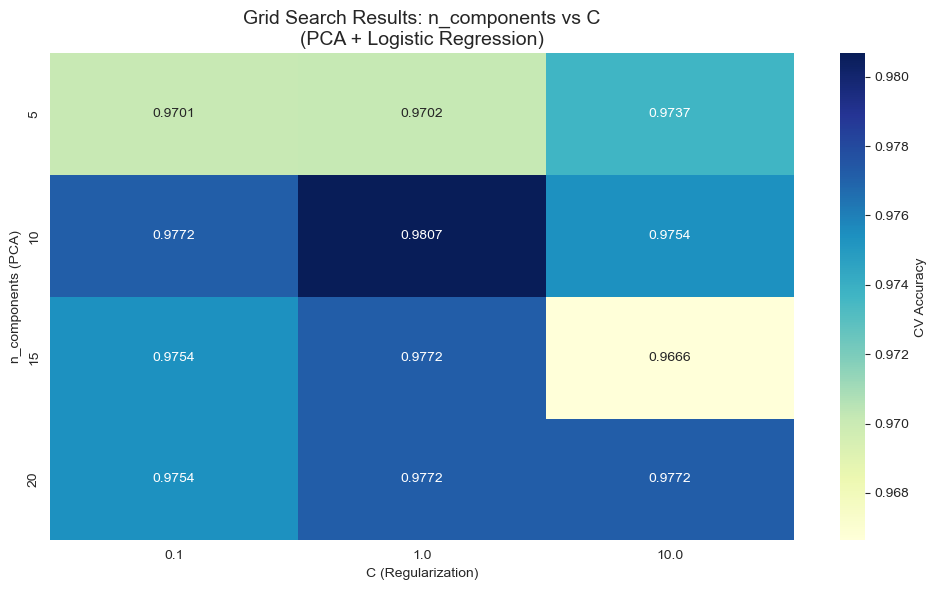

In [190]:
# Analyze grid search results
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_results = results_df.pivot_table(
    values='mean_test_score',
    index='param_pca__n_components',
    columns='param_classifier__C'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_results, annot=True, fmt='.4f', cmap='YlGnBu', 
            cbar_kws={'label': 'CV Accuracy'})
plt.title('Grid Search Results: n_components vs C\n(PCA + Logistic Regression)', fontsize=14)
plt.xlabel('C (Regularization)')
plt.ylabel('n_components (PCA)')
plt.tight_layout()
plt.show()

### 12.2 PCA Best Practices Checklist

In [193]:
print("\n" + "="*80)
print("✅ PCA BEST PRACTICES CHECKLIST")
print("="*80)

best_practices = [
    "✓ Always standardize features first (StandardScaler)",
    "✓ Choose n_components based on variance threshold (90-95%)",
    "✓ Use elbow method to visualize component selection",
    "✓ Analyze component loadings for interpretation",
    "✓ Use PCA in pipeline to prevent data leakage",
    "✓ Consider IncrementalPCA for large datasets",
    "✓ Use Kernel PCA for nonlinear relationships",
    "✓ Check reconstruction error if using for compression",
    "✓ Compare model performance with/without PCA",
    "✓ Remember: variance ≠ always discriminative",
    "✓ Use LDA for supervised dimensionality reduction",
    "✓ Visualize 2D/3D projections to understand data",
    "✓ Monitor training speed improvement",
    "✓ Document variance explained in production"
]

for item in best_practices:
    print(f"  {item}")

print("\n" + "="*80)


✅ PCA BEST PRACTICES CHECKLIST
  ✓ Always standardize features first (StandardScaler)
  ✓ Choose n_components based on variance threshold (90-95%)
  ✓ Use elbow method to visualize component selection
  ✓ Analyze component loadings for interpretation
  ✓ Use PCA in pipeline to prevent data leakage
  ✓ Consider IncrementalPCA for large datasets
  ✓ Use Kernel PCA for nonlinear relationships
  ✓ Check reconstruction error if using for compression
  ✓ Compare model performance with/without PCA
  ✓ Remember: variance ≠ always discriminative
  ✓ Use LDA for supervised dimensionality reduction
  ✓ Visualize 2D/3D projections to understand data
  ✓ Monitor training speed improvement
  ✓ Document variance explained in production



### 12.3 Common Pitfalls to Avoid

In [196]:
print("\n⚠️ COMMON PCA PITFALLS TO AVOID:")
print("="*80)

pitfalls = [
    "❌ Not scaling features → Large-scale features dominate",
    "❌ Applying PCA before train-test split → Data leakage",
    "❌ Assuming variance = importance → May lose discriminative info",
    "❌ Using PCA on sparse data (text) → Destroys sparsity",
    "❌ Keeping too few components → Information loss",
    "❌ Keeping too many components → No benefit",
    "❌ Using for nonlinear data → Use Kernel PCA/t-SNE instead",
    "❌ Not checking reconstruction error → Unknown quality",
    "❌ Ignoring component interpretability → Black box",
    "❌ Using when features uncorrelated → No benefit"
]

for i, pitfall in enumerate(pitfalls, 1):
    print(f"{i:2d}. {pitfall}")

print("\n" + "="*80)


⚠️ COMMON PCA PITFALLS TO AVOID:
 1. ❌ Not scaling features → Large-scale features dominate
 2. ❌ Applying PCA before train-test split → Data leakage
 3. ❌ Assuming variance = importance → May lose discriminative info
 4. ❌ Using PCA on sparse data (text) → Destroys sparsity
 5. ❌ Keeping too few components → Information loss
 6. ❌ Keeping too many components → No benefit
 7. ❌ Using for nonlinear data → Use Kernel PCA/t-SNE instead
 8. ❌ Not checking reconstruction error → Unknown quality
 9. ❌ Ignoring component interpretability → Black box
10. ❌ Using when features uncorrelated → No benefit



## 📊 Section 13: Summary & Key Takeaways

### 13.1 Summary: Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **PCA** finds directions of maximum variance in data
2. **Principal Components** are orthogonal, ordered by importance
3. **Variance explained** measures information retention
4. **Dimensionality reduction** speeds up ML, reduces overfitting
5. **Standardization** is critical before PCA
6. **Linear transformation** - cannot capture nonlinear patterns
7. **Reconstruction** possible (with information loss)
8. **Applications**: visualization, compression, noise reduction, feature engineering

---

#### 📊 PCA Performance Summary:

| **Dataset** | **Original Dims** | **Reduced Dims** | **Variance Kept** | **Reduction** |
|------------|------------------|------------------|------------------|---------------|
| **Breast Cancer** | 30 | 10 | 95% | 67% |
| **Digits** | 64 | 21 | 95% | 67% |
| **Faces** | 4096 | 150 | 90% | 96% |

---

#### 🎯 When to Use PCA:

**✅ Use PCA When:**
- Have many correlated features (>20)
- Need visualization (2D/3D projection)
- Training is too slow
- Want to reduce overfitting
- Need data compression
- Features are continuous/numerical
- Variance represents importance
- Need noise reduction

**❌ Don't Use PCA When:**
- Features are already uncorrelated
- Have sparse data (text, one-hot)
- Need interpretable features
- Nonlinear relationships critical
- Few features (<10)
- Classification task (use LDA instead)
- Variance ≠ discriminative power

---

#### ⚠️ Common Pitfalls:

1. **Forgetting to scale** → Large features dominate
2. **Fitting on test data** → Data leakage
3. **Using on sparse data** → Destroys sparsity
4. **Assuming linearity** → Misses nonlinear patterns
5. **Not checking variance** → Don't know information loss
6. **Over-reducing** → Lose too much information
7. **Under-reducing** → No benefit, still slow
8. **Ignoring interpretability** → Black box features

---

#### 🔬 PCA Variants:

| **Variant** | **Use Case** | **Advantage** | **Limitation** |
|------------|-------------|--------------|---------------|
| **Standard PCA** | General use | Fast, simple | Linear only |
| **Incremental PCA** | Large datasets | Memory-efficient | Approximate |
| **Sparse PCA** | Interpretability | Few features per PC | Slower |
| **Kernel PCA** | Nonlinear data | Captures nonlinearity | No inverse transform |
| **Randomized PCA** | Very large data | Very fast | Approximate |

---

#### 🚀 Advanced Techniques:

1. **Whitening**: Normalize component variance to 1
2. **MLE selection**: Automatically choose n_components
3. **Incremental fitting**: Process data in batches
4. **Kernel tricks**: Nonlinear transformations
5. **Sparse components**: Force interpretability
6. **2-stage PCA**: PCA → Classification → PCA again

---

#### 📚 Next Steps:

**Continue Module 05: Dimensionality Reduction!**

1. **Notebook 20: ICA** - Independent Component Analysis (next!)
2. **Notebook 21: t-SNE & UMAP** - Nonlinear visualization

**Compare with:**
- LDA (Linear Discriminant Analysis) - supervised
- t-SNE - nonlinear visualization
- UMAP - nonlinear, faster than t-SNE
- Autoencoders - neural network dimensionality reduction

---

### 🎓 Practice Exercises:

1. **Load wine dataset** and reduce to 2D, visualize 3 classes
2. **Test different variance thresholds** (80%, 90%, 95%, 99%)
3. **Compare PCA with LDA** on classification task
4. **Implement face reconstruction** with varying components
5. **Add noise to digits** and denoise with PCA
6. **Build pipeline** with PCA + GridSearchCV
7. **Compare Kernel PCA** (RBF, poly) with linear PCA
8. **Analyze component loadings** to interpret PCs

---

### 📖 Further Reading:

- **Original Paper**: Pearson (1901) - "On Lines and Planes of Closest Fit"
- **Modern PCA**: Jolliffe (2002) - "Principal Component Analysis"
- **Kernel PCA**: Schölkopf et al. (1998) - "Nonlinear Component Analysis as a Kernel Eigenvalue Problem"
- **Sklearn Docs**: [PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca)

---

### 🔥 Pro Tips:

1. **Always scale first** - Use StandardScaler
2. **Use 90-95% variance** - Good balance
3. **Check elbow plot** - Visual component selection
4. **Use in pipeline** - Prevent data leakage
5. **Visualize loadings** - Understand components
6. **Compare before/after** - Validate improvement
7. **Monitor reconstruction error** - Quantify loss
8. **Try Kernel PCA** - For nonlinear data
9. **Use IncrementalPCA** - For large datasets
10. **Document variance kept** - For reproducibility

---

## 🎯 Quick Reference Card

```python
# Standard PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Always scale first!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with specific number of components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# PCA with variance threshold
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# Access attributes
explained_var = pca.explained_variance_ratio_  # Variance per component
components = pca.components_                    # Component loadings
n_components = pca.n_components_                # Number selected

# Inverse transform (reconstruction)
X_reconstructed = pca.inverse_transform(X_pca)

# Pipeline (prevents data leakage)
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

# Incremental PCA (large datasets)
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=10, batch_size=100)
ipca.fit(X_scaled)

# Kernel PCA (nonlinear)
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)

# Sparse PCA (interpretable)
from sklearn.decomposition import SparsePCA

spca = SparsePCA(n_components=10, alpha=1.0)
X_spca = spca.fit_transform(X_scaled)
```

---

### 📊 Decision Guide: PCA vs Other Methods

| **Choose PCA** | **Choose LDA** | **Choose t-SNE** | **Choose UMAP** |
|---------------|---------------|-----------------|----------------|
| Unsupervised | Supervised | Visualization | Visualization + ML |
| Linear relationships | Classification | Nonlinear | Nonlinear |
| Speed priority | Discriminative | Pretty plots | Faster than t-SNE |
| Many features | Few classes | 2D/3D only | Scalable |

---

**🎉 Congratulations!** You now master PCA and linear dimensionality reduction!

**Module 05 Progress: 1/3 Complete! 📉**

You've mastered:
- ✅ Curse of dimensionality
- ✅ PCA mathematics (eigenvectors, eigenvalues)
- ✅ Variance explained and component selection
- ✅ Component interpretation (loadings)
- ✅ Visualization (2D/3D projections)
- ✅ Reconstruction and compression
- ✅ Applications (faces, digits, classification)
- ✅ PCA variants (Incremental, Sparse, Kernel)

**Next: ICA - Independent Component Analysis! 🎵**

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT